In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('grayscale')

print(os.getcwd())

#pair 1: AUD rates higher than JPY, spot unchanged.  Forwards are lower than realizations of spot, hence carry "works"
df_audjpy = pd.read_csv('../data/audjpy.csv')
df_audjpy['AUDJPY_Fwd'] = df_audjpy['AUDJPY'] + df_audjpy['AUDJPY3M']/100
df_audjpy['AUDJPY_FwdSlope'] = (252/63) * np.log(df_audjpy['AUDJPY_Fwd'] / df_audjpy['AUDJPY'])
df_audjpy['AUDJPY_Spot3MFwd'] = df_audjpy['AUDJPY'].shift(-21*3)
df_audjpy['AUDJPY_SpotChange'] = (df_audjpy['AUDJPY_Spot3MFwd'] - df_audjpy['AUDJPY']) / df_audjpy['AUDJPY']
df_audjpy['AUDJPY_OutperfVsFwd'] = (df_audjpy['AUDJPY_Fwd'] - df_audjpy['AUDJPY_Spot3MFwd']) / df_audjpy['AUDJPY_Fwd']
df_audjpy['CumCarryPerf'] = -df_audjpy['AUDJPY_OutperfVsFwd'].cumsum()
df_audjpy.set_index(pd.to_datetime(df_audjpy['Dates']), inplace=True)

#pair 2: BRL rates much higher than USD, but BRL depreciates significantly.  Forwards are higher but not as high as future realizations hence carry "does not work"
df_usdbrl = pd.read_csv('../data/usdbrl.csv')
df_usdbrl['USDBRL_Fwd'] = df_usdbrl['USDBRL'] + df_usdbrl['BCN3M']/10000
df_usdbrl['USDBRL_FwdSlope'] = (252/63) * np.log(df_usdbrl['USDBRL_Fwd'] / df_usdbrl['USDBRL'])
df_usdbrl['USDBRL_Spot3MFwd'] = df_usdbrl['USDBRL'].shift(-21*3)
df_usdbrl['USDBRL_SpotChange'] = (df_usdbrl['USDBRL_Spot3MFwd'] - df_usdbrl['USDBRL']) / df_usdbrl['USDBRL']
df_usdbrl['USDBRL_OutperfVsFwd'] = (df_usdbrl['USDBRL_Spot3MFwd'] - df_usdbrl['USDBRL_Fwd']) / df_usdbrl['USDBRL_Fwd']
df_usdbrl['CumCarryPerf'] = -df_usdbrl['USDBRL_OutperfVsFwd'].cumsum()
df_usdbrl.set_index(pd.to_datetime(df_usdbrl['Dates']), inplace=True)

/Users/christopherkelliher/Documents/BUCourses/esck1/Book/MyBook/chapters/chapter15/code


In [63]:
df_usdjpy['USDJPY_OutperfVsFwd'].mean()*252/63, df_usdjpy['USDJPY_SpotChange'].mean()*252/63, df_usdjpy['USDJPY_FwdSlope'].mean()

(-0.04231519308257587, 0.03128262663352431, -0.01081236410321278)

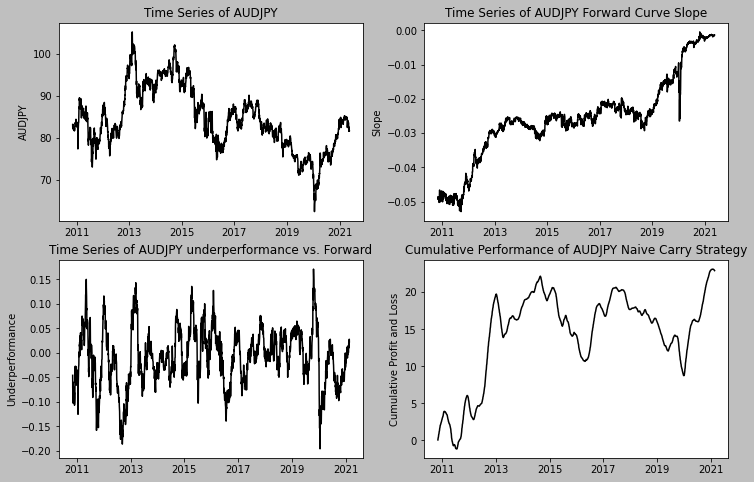

-0.034111341192159285
0.00794215895003944
-0.02550146332430399


In [68]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('grayscale')
plt.figure(figsize=(12, 8))

fmt_half_year = mdates.MonthLocator(interval=24)
formatter = mdates.DateFormatter("%Y")

#visualization 1: time series of spot
ax1 = plt.subplot(2, 2, 1)
plt.title("Time Series of AUDJPY")
#plt.xlabel("Date")
plt.ylabel("AUDJPY")
plt.plot(df_audjpy['AUDJPY'])
ax1.xaxis.set_major_locator(fmt_half_year)
ax1.xaxis.set_major_formatter(formatter)

#visualization 2: time series of slope of forward curve
ax2 = plt.subplot(2, 2, 2)
plt.title("Time Series of AUDJPY Forward Curve Slope")
#plt.xlabel("Date")
plt.ylabel("Slope")
plt.plot(df_audjpy['AUDJPY_FwdSlope'])
ax2.xaxis.set_major_locator(fmt_half_year)
ax2.xaxis.set_major_formatter(formatter)

#visualization 3: time series of fwd underperformance/overperformance
ax3 = plt.subplot(2, 2, 3)
plt.title("Time Series of AUDJPY underperformance vs. Forward")
#plt.xlabel("Date")
plt.ylabel("Underperformance")
plt.plot(df_audjpy['AUDJPY_OutperfVsFwd'])
ax3.xaxis.set_major_locator(fmt_half_year)
ax3.xaxis.set_major_formatter(formatter)

#visualization 4: cumulative carry performance
ax4 = plt.subplot(2, 2, 4)
plt.title("Cumulative Performance of AUDJPY Naive Carry Strategy")
#plt.xlabel("Date")
plt.ylabel("Cumulative Profit and Loss")
plt.plot(df_audjpy['CumCarryPerf'])
ax4.xaxis.set_major_locator(fmt_half_year)
ax4.xaxis.set_major_formatter(formatter)

plt.savefig('audjpy_carry.png')
plt.show()

print(df_audjpy['AUDJPY_OutperfVsFwd'].mean()*252/63)
print(df_audjpy['AUDJPY_SpotChange'].mean()*252/63)
print(df_audjpy['AUDJPY_FwdSlope'].mean())

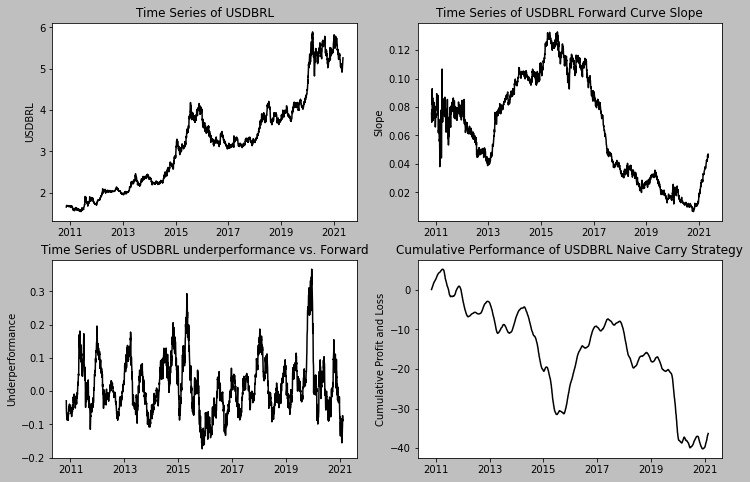

0.054155374322262674
0.12109510183234602
0.06509697547869396


In [69]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('grayscale')
plt.figure(figsize=(12, 8))

fmt_half_year = mdates.MonthLocator(interval=24)
formatter = mdates.DateFormatter("%Y")

#visualization 1: time series of spot
ax1 = plt.subplot(2, 2, 1)
plt.title("Time Series of USDBRL")
#plt.xlabel("Date")
plt.ylabel("USDBRL")
plt.plot(df_usdbrl['USDBRL'])
ax1.xaxis.set_major_locator(fmt_half_year)
ax1.xaxis.set_major_formatter(formatter)

#visualization 2: time series of slope of forward curve
ax2 = plt.subplot(2, 2, 2)
plt.title("Time Series of USDBRL Forward Curve Slope")
#plt.xlabel("Date")
plt.ylabel("Slope")
plt.plot(df_usdbrl['USDBRL_FwdSlope'])
ax2.xaxis.set_major_locator(fmt_half_year)
ax2.xaxis.set_major_formatter(formatter)

#visualization 3: time series of fwd underperformance/overperformance
ax3 = plt.subplot(2, 2, 3)
plt.title("Time Series of USDBRL underperformance vs. Forward")
#plt.xlabel("Date")
plt.ylabel("Underperformance")
plt.plot(df_usdbrl['USDBRL_OutperfVsFwd'])
ax3.xaxis.set_major_locator(fmt_half_year)
ax3.xaxis.set_major_formatter(formatter)

#visualization 4: cumulative carry performance
ax4 = plt.subplot(2, 2, 4)
plt.title("Cumulative Performance of USDBRL Naive Carry Strategy")
#plt.xlabel("Date")
plt.ylabel("Cumulative Profit and Loss")
plt.plot(df_usdbrl['CumCarryPerf'])
ax4.xaxis.set_major_locator(fmt_half_year)
ax4.xaxis.set_major_formatter(formatter)

plt.savefig('usdbrl_carry.png')
plt.show()

print(df_usdbrl['USDBRL_OutperfVsFwd'].mean()*252/63)
print(df_usdbrl['USDBRL_SpotChange'].mean()*252/63)
print(df_usdbrl['USDBRL_FwdSlope'].mean())

,Dates,AUDJPY,AUDJPY3M,AUDJPY_Fwd,AUDJPY_FwdSlope,AUDJPY_Spot3MFwd,AUDJPY_SpotChange,AUDJPY_OutperfVsFwd,CumCarryPerf
0,1/3/2011,83.105,-101.83,82.0867,-0.049315,85.866,0.033223,-0.046040,0.046040
1,1/4/2011,82.453,-100.37,81.4493,-0.048991,87.320,0.059028,-0.072078,0.118118
2,1/5/2011,83.210,-100.95,82.2005,-0.048825,87.107,0.046833,-0.059689,0.177808
3,1/6/2011,82.848,-99.93,81.8487,-0.048541,87.658,0.058058,-0.070976,0.248784
4,1/7/2011,82.801,-100.78,81.7932,-0.048984,89.258,0.077982,-0.091264,0.340048
...,...,...,...,...,...,...,...,...,...
2745,7/12/2021,82.537,-3.24,82.5046,-0.001571,NaN,NaN,NaN,NaN
2746,7/13/2021,82.383,-3.16,82.3514,-0.001535,NaN,NaN,NaN,NaN
2747,7/14/2021,82.259,-3.01,82.2289,-0.001464,NaN,NaN,NaN,NaN
2748,7/15/2021,81.538,-2.92,81.5088,-0.001433,NaN,NaN,NaN,NaN


In [30]:
df_audjpy

,Dates,AUDJPY,AUDJPY3M,AUDJPY_Fwd,AUDJPY_FwdSlope,AUDJPY_Spot3MFwd,AUDJPY_SpotChange,AUDJPY_OutperfVsFwd,CumCarryPerf
0,1/3/2011,83.105,-101.83,82.0867,-0.049315,85.866,0.033223,-0.046040,0.046040
1,1/4/2011,82.453,-100.37,81.4493,-0.048991,87.320,0.059028,-0.072078,0.118118
2,1/5/2011,83.210,-100.95,82.2005,-0.048825,87.107,0.046833,-0.059689,0.177808
3,1/6/2011,82.848,-99.93,81.8487,-0.048541,87.658,0.058058,-0.070976,0.248784
4,1/7/2011,82.801,-100.78,81.7932,-0.048984,89.258,0.077982,-0.091264,0.340048
...,...,...,...,...,...,...,...,...,...
2745,7/12/2021,82.537,-3.24,82.5046,-0.001571,NaN,NaN,NaN,NaN
2746,7/13/2021,82.383,-3.16,82.3514,-0.001535,NaN,NaN,NaN,NaN
2747,7/14/2021,82.259,-3.01,82.2289,-0.001464,NaN,NaN,NaN,NaN
2748,7/15/2021,81.538,-2.92,81.5088,-0.001433,NaN,NaN,NaN,NaN


In [45]:
df_audjpy['AUDJPY_FwdSlope']

Dates
1/3/2011    -0.049315
1/4/2011    -0.048991
1/5/2011    -0.048825
1/6/2011    -0.048541
1/7/2011    -0.048984
               ...   
7/12/2021   -0.001571
7/13/2021   -0.001535
7/14/2021   -0.001464
7/15/2021   -0.001433
7/16/2021   -0.001427
Name: AUDJPY_FwdSlope, Length: 2750, dtype: float64

In [52]:
[datetime.strptime(date, '%m/%d/%Y').date() for date in df_audjpy['Dates'].values]

[datetime.date(2011, 1, 3),
 datetime.date(2011, 1, 4),
 datetime.date(2011, 1, 5),
 datetime.date(2011, 1, 6),
 datetime.date(2011, 1, 7),
 datetime.date(2011, 1, 10),
 datetime.date(2011, 1, 11),
 datetime.date(2011, 1, 12),
 datetime.date(2011, 1, 13),
 datetime.date(2011, 1, 14),
 datetime.date(2011, 1, 17),
 datetime.date(2011, 1, 18),
 datetime.date(2011, 1, 19),
 datetime.date(2011, 1, 20),
 datetime.date(2011, 1, 21),
 datetime.date(2011, 1, 24),
 datetime.date(2011, 1, 25),
 datetime.date(2011, 1, 26),
 datetime.date(2011, 1, 27),
 datetime.date(2011, 1, 28),
 datetime.date(2011, 1, 31),
 datetime.date(2011, 2, 1),
 datetime.date(2011, 2, 2),
 datetime.date(2011, 2, 3),
 datetime.date(2011, 2, 4),
 datetime.date(2011, 2, 7),
 datetime.date(2011, 2, 8),
 datetime.date(2011, 2, 9),
 datetime.date(2011, 2, 10),
 datetime.date(2011, 2, 11),
 datetime.date(2011, 2, 14),
 datetime.date(2011, 2, 15),
 datetime.date(2011, 2, 16),
 datetime.date(2011, 2, 17),
 datetime.date(2011, 2, 18

In [57]:
df_audjpy.set_index([datetime.strptime(date, '%m/%d/%Y') for date in df_audjpy['Dates'].values], inplace=True)

KeyError: 'None of [datetime.datetime(2011, 1, 3, 0, 0), datetime.datetime(2011, 1, 4, 0, 0), datetime.datetime(2011, 1, 5, 0, 0), datetime.datetime(2011, 1, 6, 0, 0), datetime.datetime(2011, 1, 7, 0, 0), datetime.datetime(2011, 1, 10, 0, 0), datetime.datetime(2011, 1, 11, 0, 0), datetime.datetime(2011, 1, 12, 0, 0), datetime.datetime(2011, 1, 13, 0, 0), datetime.datetime(2011, 1, 14, 0, 0), datetime.datetime(2011, 1, 17, 0, 0), datetime.datetime(2011, 1, 18, 0, 0), datetime.datetime(2011, 1, 19, 0, 0), datetime.datetime(2011, 1, 20, 0, 0), datetime.datetime(2011, 1, 21, 0, 0), datetime.datetime(2011, 1, 24, 0, 0), datetime.datetime(2011, 1, 25, 0, 0), datetime.datetime(2011, 1, 26, 0, 0), datetime.datetime(2011, 1, 27, 0, 0), datetime.datetime(2011, 1, 28, 0, 0), datetime.datetime(2011, 1, 31, 0, 0), datetime.datetime(2011, 2, 1, 0, 0), datetime.datetime(2011, 2, 2, 0, 0), datetime.datetime(2011, 2, 3, 0, 0), datetime.datetime(2011, 2, 4, 0, 0), datetime.datetime(2011, 2, 7, 0, 0), datetime.datetime(2011, 2, 8, 0, 0), datetime.datetime(2011, 2, 9, 0, 0), datetime.datetime(2011, 2, 10, 0, 0), datetime.datetime(2011, 2, 11, 0, 0), datetime.datetime(2011, 2, 14, 0, 0), datetime.datetime(2011, 2, 15, 0, 0), datetime.datetime(2011, 2, 16, 0, 0), datetime.datetime(2011, 2, 17, 0, 0), datetime.datetime(2011, 2, 18, 0, 0), datetime.datetime(2011, 2, 21, 0, 0), datetime.datetime(2011, 2, 22, 0, 0), datetime.datetime(2011, 2, 23, 0, 0), datetime.datetime(2011, 2, 24, 0, 0), datetime.datetime(2011, 2, 25, 0, 0), datetime.datetime(2011, 2, 28, 0, 0), datetime.datetime(2011, 3, 1, 0, 0), datetime.datetime(2011, 3, 2, 0, 0), datetime.datetime(2011, 3, 3, 0, 0), datetime.datetime(2011, 3, 4, 0, 0), datetime.datetime(2011, 3, 7, 0, 0), datetime.datetime(2011, 3, 8, 0, 0), datetime.datetime(2011, 3, 9, 0, 0), datetime.datetime(2011, 3, 10, 0, 0), datetime.datetime(2011, 3, 11, 0, 0), datetime.datetime(2011, 3, 14, 0, 0), datetime.datetime(2011, 3, 15, 0, 0), datetime.datetime(2011, 3, 16, 0, 0), datetime.datetime(2011, 3, 17, 0, 0), datetime.datetime(2011, 3, 18, 0, 0), datetime.datetime(2011, 3, 21, 0, 0), datetime.datetime(2011, 3, 22, 0, 0), datetime.datetime(2011, 3, 23, 0, 0), datetime.datetime(2011, 3, 24, 0, 0), datetime.datetime(2011, 3, 25, 0, 0), datetime.datetime(2011, 3, 28, 0, 0), datetime.datetime(2011, 3, 29, 0, 0), datetime.datetime(2011, 3, 30, 0, 0), datetime.datetime(2011, 3, 31, 0, 0), datetime.datetime(2011, 4, 1, 0, 0), datetime.datetime(2011, 4, 4, 0, 0), datetime.datetime(2011, 4, 5, 0, 0), datetime.datetime(2011, 4, 6, 0, 0), datetime.datetime(2011, 4, 7, 0, 0), datetime.datetime(2011, 4, 8, 0, 0), datetime.datetime(2011, 4, 11, 0, 0), datetime.datetime(2011, 4, 12, 0, 0), datetime.datetime(2011, 4, 13, 0, 0), datetime.datetime(2011, 4, 14, 0, 0), datetime.datetime(2011, 4, 15, 0, 0), datetime.datetime(2011, 4, 18, 0, 0), datetime.datetime(2011, 4, 19, 0, 0), datetime.datetime(2011, 4, 20, 0, 0), datetime.datetime(2011, 4, 21, 0, 0), datetime.datetime(2011, 4, 22, 0, 0), datetime.datetime(2011, 4, 25, 0, 0), datetime.datetime(2011, 4, 26, 0, 0), datetime.datetime(2011, 4, 27, 0, 0), datetime.datetime(2011, 4, 28, 0, 0), datetime.datetime(2011, 4, 29, 0, 0), datetime.datetime(2011, 5, 2, 0, 0), datetime.datetime(2011, 5, 3, 0, 0), datetime.datetime(2011, 5, 4, 0, 0), datetime.datetime(2011, 5, 5, 0, 0), datetime.datetime(2011, 5, 6, 0, 0), datetime.datetime(2011, 5, 9, 0, 0), datetime.datetime(2011, 5, 10, 0, 0), datetime.datetime(2011, 5, 11, 0, 0), datetime.datetime(2011, 5, 12, 0, 0), datetime.datetime(2011, 5, 13, 0, 0), datetime.datetime(2011, 5, 16, 0, 0), datetime.datetime(2011, 5, 17, 0, 0), datetime.datetime(2011, 5, 18, 0, 0), datetime.datetime(2011, 5, 19, 0, 0), datetime.datetime(2011, 5, 20, 0, 0), datetime.datetime(2011, 5, 23, 0, 0), datetime.datetime(2011, 5, 24, 0, 0), datetime.datetime(2011, 5, 25, 0, 0), datetime.datetime(2011, 5, 26, 0, 0), datetime.datetime(2011, 5, 27, 0, 0), datetime.datetime(2011, 5, 30, 0, 0), datetime.datetime(2011, 5, 31, 0, 0), datetime.datetime(2011, 6, 1, 0, 0), datetime.datetime(2011, 6, 2, 0, 0), datetime.datetime(2011, 6, 3, 0, 0), datetime.datetime(2011, 6, 6, 0, 0), datetime.datetime(2011, 6, 7, 0, 0), datetime.datetime(2011, 6, 8, 0, 0), datetime.datetime(2011, 6, 9, 0, 0), datetime.datetime(2011, 6, 10, 0, 0), datetime.datetime(2011, 6, 13, 0, 0), datetime.datetime(2011, 6, 14, 0, 0), datetime.datetime(2011, 6, 15, 0, 0), datetime.datetime(2011, 6, 16, 0, 0), datetime.datetime(2011, 6, 17, 0, 0), datetime.datetime(2011, 6, 20, 0, 0), datetime.datetime(2011, 6, 21, 0, 0), datetime.datetime(2011, 6, 22, 0, 0), datetime.datetime(2011, 6, 23, 0, 0), datetime.datetime(2011, 6, 24, 0, 0), datetime.datetime(2011, 6, 27, 0, 0), datetime.datetime(2011, 6, 28, 0, 0), datetime.datetime(2011, 6, 29, 0, 0), datetime.datetime(2011, 6, 30, 0, 0), datetime.datetime(2011, 7, 1, 0, 0), datetime.datetime(2011, 7, 4, 0, 0), datetime.datetime(2011, 7, 5, 0, 0), datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 7, 7, 0, 0), datetime.datetime(2011, 7, 8, 0, 0), datetime.datetime(2011, 7, 11, 0, 0), datetime.datetime(2011, 7, 12, 0, 0), datetime.datetime(2011, 7, 13, 0, 0), datetime.datetime(2011, 7, 14, 0, 0), datetime.datetime(2011, 7, 15, 0, 0), datetime.datetime(2011, 7, 18, 0, 0), datetime.datetime(2011, 7, 19, 0, 0), datetime.datetime(2011, 7, 20, 0, 0), datetime.datetime(2011, 7, 21, 0, 0), datetime.datetime(2011, 7, 22, 0, 0), datetime.datetime(2011, 7, 25, 0, 0), datetime.datetime(2011, 7, 26, 0, 0), datetime.datetime(2011, 7, 27, 0, 0), datetime.datetime(2011, 7, 28, 0, 0), datetime.datetime(2011, 7, 29, 0, 0), datetime.datetime(2011, 8, 1, 0, 0), datetime.datetime(2011, 8, 2, 0, 0), datetime.datetime(2011, 8, 3, 0, 0), datetime.datetime(2011, 8, 4, 0, 0), datetime.datetime(2011, 8, 5, 0, 0), datetime.datetime(2011, 8, 8, 0, 0), datetime.datetime(2011, 8, 9, 0, 0), datetime.datetime(2011, 8, 10, 0, 0), datetime.datetime(2011, 8, 11, 0, 0), datetime.datetime(2011, 8, 12, 0, 0), datetime.datetime(2011, 8, 15, 0, 0), datetime.datetime(2011, 8, 16, 0, 0), datetime.datetime(2011, 8, 17, 0, 0), datetime.datetime(2011, 8, 18, 0, 0), datetime.datetime(2011, 8, 19, 0, 0), datetime.datetime(2011, 8, 22, 0, 0), datetime.datetime(2011, 8, 23, 0, 0), datetime.datetime(2011, 8, 24, 0, 0), datetime.datetime(2011, 8, 25, 0, 0), datetime.datetime(2011, 8, 26, 0, 0), datetime.datetime(2011, 8, 29, 0, 0), datetime.datetime(2011, 8, 30, 0, 0), datetime.datetime(2011, 8, 31, 0, 0), datetime.datetime(2011, 9, 1, 0, 0), datetime.datetime(2011, 9, 2, 0, 0), datetime.datetime(2011, 9, 5, 0, 0), datetime.datetime(2011, 9, 6, 0, 0), datetime.datetime(2011, 9, 7, 0, 0), datetime.datetime(2011, 9, 8, 0, 0), datetime.datetime(2011, 9, 9, 0, 0), datetime.datetime(2011, 9, 12, 0, 0), datetime.datetime(2011, 9, 13, 0, 0), datetime.datetime(2011, 9, 14, 0, 0), datetime.datetime(2011, 9, 15, 0, 0), datetime.datetime(2011, 9, 16, 0, 0), datetime.datetime(2011, 9, 19, 0, 0), datetime.datetime(2011, 9, 20, 0, 0), datetime.datetime(2011, 9, 21, 0, 0), datetime.datetime(2011, 9, 22, 0, 0), datetime.datetime(2011, 9, 23, 0, 0), datetime.datetime(2011, 9, 26, 0, 0), datetime.datetime(2011, 9, 27, 0, 0), datetime.datetime(2011, 9, 28, 0, 0), datetime.datetime(2011, 9, 29, 0, 0), datetime.datetime(2011, 9, 30, 0, 0), datetime.datetime(2011, 10, 3, 0, 0), datetime.datetime(2011, 10, 4, 0, 0), datetime.datetime(2011, 10, 5, 0, 0), datetime.datetime(2011, 10, 6, 0, 0), datetime.datetime(2011, 10, 7, 0, 0), datetime.datetime(2011, 10, 10, 0, 0), datetime.datetime(2011, 10, 11, 0, 0), datetime.datetime(2011, 10, 12, 0, 0), datetime.datetime(2011, 10, 13, 0, 0), datetime.datetime(2011, 10, 14, 0, 0), datetime.datetime(2011, 10, 17, 0, 0), datetime.datetime(2011, 10, 18, 0, 0), datetime.datetime(2011, 10, 19, 0, 0), datetime.datetime(2011, 10, 20, 0, 0), datetime.datetime(2011, 10, 21, 0, 0), datetime.datetime(2011, 10, 24, 0, 0), datetime.datetime(2011, 10, 25, 0, 0), datetime.datetime(2011, 10, 26, 0, 0), datetime.datetime(2011, 10, 27, 0, 0), datetime.datetime(2011, 10, 28, 0, 0), datetime.datetime(2011, 10, 31, 0, 0), datetime.datetime(2011, 11, 1, 0, 0), datetime.datetime(2011, 11, 2, 0, 0), datetime.datetime(2011, 11, 3, 0, 0), datetime.datetime(2011, 11, 4, 0, 0), datetime.datetime(2011, 11, 7, 0, 0), datetime.datetime(2011, 11, 8, 0, 0), datetime.datetime(2011, 11, 9, 0, 0), datetime.datetime(2011, 11, 10, 0, 0), datetime.datetime(2011, 11, 11, 0, 0), datetime.datetime(2011, 11, 14, 0, 0), datetime.datetime(2011, 11, 15, 0, 0), datetime.datetime(2011, 11, 16, 0, 0), datetime.datetime(2011, 11, 17, 0, 0), datetime.datetime(2011, 11, 18, 0, 0), datetime.datetime(2011, 11, 21, 0, 0), datetime.datetime(2011, 11, 22, 0, 0), datetime.datetime(2011, 11, 23, 0, 0), datetime.datetime(2011, 11, 24, 0, 0), datetime.datetime(2011, 11, 25, 0, 0), datetime.datetime(2011, 11, 28, 0, 0), datetime.datetime(2011, 11, 29, 0, 0), datetime.datetime(2011, 11, 30, 0, 0), datetime.datetime(2011, 12, 1, 0, 0), datetime.datetime(2011, 12, 2, 0, 0), datetime.datetime(2011, 12, 5, 0, 0), datetime.datetime(2011, 12, 6, 0, 0), datetime.datetime(2011, 12, 7, 0, 0), datetime.datetime(2011, 12, 8, 0, 0), datetime.datetime(2011, 12, 9, 0, 0), datetime.datetime(2011, 12, 12, 0, 0), datetime.datetime(2011, 12, 13, 0, 0), datetime.datetime(2011, 12, 14, 0, 0), datetime.datetime(2011, 12, 15, 0, 0), datetime.datetime(2011, 12, 16, 0, 0), datetime.datetime(2011, 12, 19, 0, 0), datetime.datetime(2011, 12, 20, 0, 0), datetime.datetime(2011, 12, 21, 0, 0), datetime.datetime(2011, 12, 22, 0, 0), datetime.datetime(2011, 12, 23, 0, 0), datetime.datetime(2011, 12, 26, 0, 0), datetime.datetime(2011, 12, 27, 0, 0), datetime.datetime(2011, 12, 28, 0, 0), datetime.datetime(2011, 12, 29, 0, 0), datetime.datetime(2011, 12, 30, 0, 0), datetime.datetime(2012, 1, 2, 0, 0), datetime.datetime(2012, 1, 3, 0, 0), datetime.datetime(2012, 1, 4, 0, 0), datetime.datetime(2012, 1, 5, 0, 0), datetime.datetime(2012, 1, 6, 0, 0), datetime.datetime(2012, 1, 9, 0, 0), datetime.datetime(2012, 1, 10, 0, 0), datetime.datetime(2012, 1, 11, 0, 0), datetime.datetime(2012, 1, 12, 0, 0), datetime.datetime(2012, 1, 13, 0, 0), datetime.datetime(2012, 1, 16, 0, 0), datetime.datetime(2012, 1, 17, 0, 0), datetime.datetime(2012, 1, 18, 0, 0), datetime.datetime(2012, 1, 19, 0, 0), datetime.datetime(2012, 1, 20, 0, 0), datetime.datetime(2012, 1, 23, 0, 0), datetime.datetime(2012, 1, 24, 0, 0), datetime.datetime(2012, 1, 25, 0, 0), datetime.datetime(2012, 1, 26, 0, 0), datetime.datetime(2012, 1, 27, 0, 0), datetime.datetime(2012, 1, 30, 0, 0), datetime.datetime(2012, 1, 31, 0, 0), datetime.datetime(2012, 2, 1, 0, 0), datetime.datetime(2012, 2, 2, 0, 0), datetime.datetime(2012, 2, 3, 0, 0), datetime.datetime(2012, 2, 6, 0, 0), datetime.datetime(2012, 2, 7, 0, 0), datetime.datetime(2012, 2, 8, 0, 0), datetime.datetime(2012, 2, 9, 0, 0), datetime.datetime(2012, 2, 10, 0, 0), datetime.datetime(2012, 2, 13, 0, 0), datetime.datetime(2012, 2, 14, 0, 0), datetime.datetime(2012, 2, 15, 0, 0), datetime.datetime(2012, 2, 16, 0, 0), datetime.datetime(2012, 2, 17, 0, 0), datetime.datetime(2012, 2, 20, 0, 0), datetime.datetime(2012, 2, 21, 0, 0), datetime.datetime(2012, 2, 22, 0, 0), datetime.datetime(2012, 2, 23, 0, 0), datetime.datetime(2012, 2, 24, 0, 0), datetime.datetime(2012, 2, 27, 0, 0), datetime.datetime(2012, 2, 28, 0, 0), datetime.datetime(2012, 2, 29, 0, 0), datetime.datetime(2012, 3, 1, 0, 0), datetime.datetime(2012, 3, 2, 0, 0), datetime.datetime(2012, 3, 5, 0, 0), datetime.datetime(2012, 3, 6, 0, 0), datetime.datetime(2012, 3, 7, 0, 0), datetime.datetime(2012, 3, 8, 0, 0), datetime.datetime(2012, 3, 9, 0, 0), datetime.datetime(2012, 3, 12, 0, 0), datetime.datetime(2012, 3, 13, 0, 0), datetime.datetime(2012, 3, 14, 0, 0), datetime.datetime(2012, 3, 15, 0, 0), datetime.datetime(2012, 3, 16, 0, 0), datetime.datetime(2012, 3, 19, 0, 0), datetime.datetime(2012, 3, 20, 0, 0), datetime.datetime(2012, 3, 21, 0, 0), datetime.datetime(2012, 3, 22, 0, 0), datetime.datetime(2012, 3, 23, 0, 0), datetime.datetime(2012, 3, 26, 0, 0), datetime.datetime(2012, 3, 27, 0, 0), datetime.datetime(2012, 3, 28, 0, 0), datetime.datetime(2012, 3, 29, 0, 0), datetime.datetime(2012, 3, 30, 0, 0), datetime.datetime(2012, 4, 2, 0, 0), datetime.datetime(2012, 4, 3, 0, 0), datetime.datetime(2012, 4, 4, 0, 0), datetime.datetime(2012, 4, 5, 0, 0), datetime.datetime(2012, 4, 6, 0, 0), datetime.datetime(2012, 4, 9, 0, 0), datetime.datetime(2012, 4, 10, 0, 0), datetime.datetime(2012, 4, 11, 0, 0), datetime.datetime(2012, 4, 12, 0, 0), datetime.datetime(2012, 4, 13, 0, 0), datetime.datetime(2012, 4, 16, 0, 0), datetime.datetime(2012, 4, 17, 0, 0), datetime.datetime(2012, 4, 18, 0, 0), datetime.datetime(2012, 4, 19, 0, 0), datetime.datetime(2012, 4, 20, 0, 0), datetime.datetime(2012, 4, 23, 0, 0), datetime.datetime(2012, 4, 24, 0, 0), datetime.datetime(2012, 4, 25, 0, 0), datetime.datetime(2012, 4, 26, 0, 0), datetime.datetime(2012, 4, 27, 0, 0), datetime.datetime(2012, 4, 30, 0, 0), datetime.datetime(2012, 5, 1, 0, 0), datetime.datetime(2012, 5, 2, 0, 0), datetime.datetime(2012, 5, 3, 0, 0), datetime.datetime(2012, 5, 4, 0, 0), datetime.datetime(2012, 5, 7, 0, 0), datetime.datetime(2012, 5, 8, 0, 0), datetime.datetime(2012, 5, 9, 0, 0), datetime.datetime(2012, 5, 10, 0, 0), datetime.datetime(2012, 5, 11, 0, 0), datetime.datetime(2012, 5, 14, 0, 0), datetime.datetime(2012, 5, 15, 0, 0), datetime.datetime(2012, 5, 16, 0, 0), datetime.datetime(2012, 5, 17, 0, 0), datetime.datetime(2012, 5, 18, 0, 0), datetime.datetime(2012, 5, 21, 0, 0), datetime.datetime(2012, 5, 22, 0, 0), datetime.datetime(2012, 5, 23, 0, 0), datetime.datetime(2012, 5, 24, 0, 0), datetime.datetime(2012, 5, 25, 0, 0), datetime.datetime(2012, 5, 28, 0, 0), datetime.datetime(2012, 5, 29, 0, 0), datetime.datetime(2012, 5, 30, 0, 0), datetime.datetime(2012, 5, 31, 0, 0), datetime.datetime(2012, 6, 1, 0, 0), datetime.datetime(2012, 6, 4, 0, 0), datetime.datetime(2012, 6, 5, 0, 0), datetime.datetime(2012, 6, 6, 0, 0), datetime.datetime(2012, 6, 7, 0, 0), datetime.datetime(2012, 6, 8, 0, 0), datetime.datetime(2012, 6, 11, 0, 0), datetime.datetime(2012, 6, 12, 0, 0), datetime.datetime(2012, 6, 13, 0, 0), datetime.datetime(2012, 6, 14, 0, 0), datetime.datetime(2012, 6, 15, 0, 0), datetime.datetime(2012, 6, 18, 0, 0), datetime.datetime(2012, 6, 19, 0, 0), datetime.datetime(2012, 6, 20, 0, 0), datetime.datetime(2012, 6, 21, 0, 0), datetime.datetime(2012, 6, 22, 0, 0), datetime.datetime(2012, 6, 25, 0, 0), datetime.datetime(2012, 6, 26, 0, 0), datetime.datetime(2012, 6, 27, 0, 0), datetime.datetime(2012, 6, 28, 0, 0), datetime.datetime(2012, 6, 29, 0, 0), datetime.datetime(2012, 7, 2, 0, 0), datetime.datetime(2012, 7, 3, 0, 0), datetime.datetime(2012, 7, 4, 0, 0), datetime.datetime(2012, 7, 5, 0, 0), datetime.datetime(2012, 7, 6, 0, 0), datetime.datetime(2012, 7, 9, 0, 0), datetime.datetime(2012, 7, 10, 0, 0), datetime.datetime(2012, 7, 11, 0, 0), datetime.datetime(2012, 7, 12, 0, 0), datetime.datetime(2012, 7, 13, 0, 0), datetime.datetime(2012, 7, 16, 0, 0), datetime.datetime(2012, 7, 17, 0, 0), datetime.datetime(2012, 7, 18, 0, 0), datetime.datetime(2012, 7, 19, 0, 0), datetime.datetime(2012, 7, 20, 0, 0), datetime.datetime(2012, 7, 23, 0, 0), datetime.datetime(2012, 7, 24, 0, 0), datetime.datetime(2012, 7, 25, 0, 0), datetime.datetime(2012, 7, 26, 0, 0), datetime.datetime(2012, 7, 27, 0, 0), datetime.datetime(2012, 7, 30, 0, 0), datetime.datetime(2012, 7, 31, 0, 0), datetime.datetime(2012, 8, 1, 0, 0), datetime.datetime(2012, 8, 2, 0, 0), datetime.datetime(2012, 8, 3, 0, 0), datetime.datetime(2012, 8, 6, 0, 0), datetime.datetime(2012, 8, 7, 0, 0), datetime.datetime(2012, 8, 8, 0, 0), datetime.datetime(2012, 8, 9, 0, 0), datetime.datetime(2012, 8, 10, 0, 0), datetime.datetime(2012, 8, 13, 0, 0), datetime.datetime(2012, 8, 14, 0, 0), datetime.datetime(2012, 8, 15, 0, 0), datetime.datetime(2012, 8, 16, 0, 0), datetime.datetime(2012, 8, 17, 0, 0), datetime.datetime(2012, 8, 20, 0, 0), datetime.datetime(2012, 8, 21, 0, 0), datetime.datetime(2012, 8, 22, 0, 0), datetime.datetime(2012, 8, 23, 0, 0), datetime.datetime(2012, 8, 24, 0, 0), datetime.datetime(2012, 8, 27, 0, 0), datetime.datetime(2012, 8, 28, 0, 0), datetime.datetime(2012, 8, 29, 0, 0), datetime.datetime(2012, 8, 30, 0, 0), datetime.datetime(2012, 8, 31, 0, 0), datetime.datetime(2012, 9, 3, 0, 0), datetime.datetime(2012, 9, 4, 0, 0), datetime.datetime(2012, 9, 5, 0, 0), datetime.datetime(2012, 9, 6, 0, 0), datetime.datetime(2012, 9, 7, 0, 0), datetime.datetime(2012, 9, 10, 0, 0), datetime.datetime(2012, 9, 11, 0, 0), datetime.datetime(2012, 9, 12, 0, 0), datetime.datetime(2012, 9, 13, 0, 0), datetime.datetime(2012, 9, 14, 0, 0), datetime.datetime(2012, 9, 17, 0, 0), datetime.datetime(2012, 9, 18, 0, 0), datetime.datetime(2012, 9, 19, 0, 0), datetime.datetime(2012, 9, 20, 0, 0), datetime.datetime(2012, 9, 21, 0, 0), datetime.datetime(2012, 9, 24, 0, 0), datetime.datetime(2012, 9, 25, 0, 0), datetime.datetime(2012, 9, 26, 0, 0), datetime.datetime(2012, 9, 27, 0, 0), datetime.datetime(2012, 9, 28, 0, 0), datetime.datetime(2012, 10, 1, 0, 0), datetime.datetime(2012, 10, 2, 0, 0), datetime.datetime(2012, 10, 3, 0, 0), datetime.datetime(2012, 10, 4, 0, 0), datetime.datetime(2012, 10, 5, 0, 0), datetime.datetime(2012, 10, 8, 0, 0), datetime.datetime(2012, 10, 9, 0, 0), datetime.datetime(2012, 10, 10, 0, 0), datetime.datetime(2012, 10, 11, 0, 0), datetime.datetime(2012, 10, 12, 0, 0), datetime.datetime(2012, 10, 15, 0, 0), datetime.datetime(2012, 10, 16, 0, 0), datetime.datetime(2012, 10, 17, 0, 0), datetime.datetime(2012, 10, 18, 0, 0), datetime.datetime(2012, 10, 19, 0, 0), datetime.datetime(2012, 10, 22, 0, 0), datetime.datetime(2012, 10, 23, 0, 0), datetime.datetime(2012, 10, 24, 0, 0), datetime.datetime(2012, 10, 25, 0, 0), datetime.datetime(2012, 10, 26, 0, 0), datetime.datetime(2012, 10, 29, 0, 0), datetime.datetime(2012, 10, 30, 0, 0), datetime.datetime(2012, 10, 31, 0, 0), datetime.datetime(2012, 11, 1, 0, 0), datetime.datetime(2012, 11, 2, 0, 0), datetime.datetime(2012, 11, 5, 0, 0), datetime.datetime(2012, 11, 6, 0, 0), datetime.datetime(2012, 11, 7, 0, 0), datetime.datetime(2012, 11, 8, 0, 0), datetime.datetime(2012, 11, 9, 0, 0), datetime.datetime(2012, 11, 12, 0, 0), datetime.datetime(2012, 11, 13, 0, 0), datetime.datetime(2012, 11, 14, 0, 0), datetime.datetime(2012, 11, 15, 0, 0), datetime.datetime(2012, 11, 16, 0, 0), datetime.datetime(2012, 11, 19, 0, 0), datetime.datetime(2012, 11, 20, 0, 0), datetime.datetime(2012, 11, 21, 0, 0), datetime.datetime(2012, 11, 22, 0, 0), datetime.datetime(2012, 11, 23, 0, 0), datetime.datetime(2012, 11, 26, 0, 0), datetime.datetime(2012, 11, 27, 0, 0), datetime.datetime(2012, 11, 28, 0, 0), datetime.datetime(2012, 11, 29, 0, 0), datetime.datetime(2012, 11, 30, 0, 0), datetime.datetime(2012, 12, 3, 0, 0), datetime.datetime(2012, 12, 4, 0, 0), datetime.datetime(2012, 12, 5, 0, 0), datetime.datetime(2012, 12, 6, 0, 0), datetime.datetime(2012, 12, 7, 0, 0), datetime.datetime(2012, 12, 10, 0, 0), datetime.datetime(2012, 12, 11, 0, 0), datetime.datetime(2012, 12, 12, 0, 0), datetime.datetime(2012, 12, 13, 0, 0), datetime.datetime(2012, 12, 14, 0, 0), datetime.datetime(2012, 12, 17, 0, 0), datetime.datetime(2012, 12, 18, 0, 0), datetime.datetime(2012, 12, 19, 0, 0), datetime.datetime(2012, 12, 20, 0, 0), datetime.datetime(2012, 12, 21, 0, 0), datetime.datetime(2012, 12, 24, 0, 0), datetime.datetime(2012, 12, 25, 0, 0), datetime.datetime(2012, 12, 26, 0, 0), datetime.datetime(2012, 12, 27, 0, 0), datetime.datetime(2012, 12, 28, 0, 0), datetime.datetime(2012, 12, 31, 0, 0), datetime.datetime(2013, 1, 1, 0, 0), datetime.datetime(2013, 1, 2, 0, 0), datetime.datetime(2013, 1, 3, 0, 0), datetime.datetime(2013, 1, 4, 0, 0), datetime.datetime(2013, 1, 7, 0, 0), datetime.datetime(2013, 1, 8, 0, 0), datetime.datetime(2013, 1, 9, 0, 0), datetime.datetime(2013, 1, 10, 0, 0), datetime.datetime(2013, 1, 11, 0, 0), datetime.datetime(2013, 1, 14, 0, 0), datetime.datetime(2013, 1, 15, 0, 0), datetime.datetime(2013, 1, 16, 0, 0), datetime.datetime(2013, 1, 17, 0, 0), datetime.datetime(2013, 1, 18, 0, 0), datetime.datetime(2013, 1, 21, 0, 0), datetime.datetime(2013, 1, 22, 0, 0), datetime.datetime(2013, 1, 23, 0, 0), datetime.datetime(2013, 1, 24, 0, 0), datetime.datetime(2013, 1, 25, 0, 0), datetime.datetime(2013, 1, 28, 0, 0), datetime.datetime(2013, 1, 29, 0, 0), datetime.datetime(2013, 1, 30, 0, 0), datetime.datetime(2013, 1, 31, 0, 0), datetime.datetime(2013, 2, 1, 0, 0), datetime.datetime(2013, 2, 4, 0, 0), datetime.datetime(2013, 2, 5, 0, 0), datetime.datetime(2013, 2, 6, 0, 0), datetime.datetime(2013, 2, 7, 0, 0), datetime.datetime(2013, 2, 8, 0, 0), datetime.datetime(2013, 2, 11, 0, 0), datetime.datetime(2013, 2, 12, 0, 0), datetime.datetime(2013, 2, 13, 0, 0), datetime.datetime(2013, 2, 14, 0, 0), datetime.datetime(2013, 2, 15, 0, 0), datetime.datetime(2013, 2, 18, 0, 0), datetime.datetime(2013, 2, 19, 0, 0), datetime.datetime(2013, 2, 20, 0, 0), datetime.datetime(2013, 2, 21, 0, 0), datetime.datetime(2013, 2, 22, 0, 0), datetime.datetime(2013, 2, 25, 0, 0), datetime.datetime(2013, 2, 26, 0, 0), datetime.datetime(2013, 2, 27, 0, 0), datetime.datetime(2013, 2, 28, 0, 0), datetime.datetime(2013, 3, 1, 0, 0), datetime.datetime(2013, 3, 4, 0, 0), datetime.datetime(2013, 3, 5, 0, 0), datetime.datetime(2013, 3, 6, 0, 0), datetime.datetime(2013, 3, 7, 0, 0), datetime.datetime(2013, 3, 8, 0, 0), datetime.datetime(2013, 3, 11, 0, 0), datetime.datetime(2013, 3, 12, 0, 0), datetime.datetime(2013, 3, 13, 0, 0), datetime.datetime(2013, 3, 14, 0, 0), datetime.datetime(2013, 3, 15, 0, 0), datetime.datetime(2013, 3, 18, 0, 0), datetime.datetime(2013, 3, 19, 0, 0), datetime.datetime(2013, 3, 20, 0, 0), datetime.datetime(2013, 3, 21, 0, 0), datetime.datetime(2013, 3, 22, 0, 0), datetime.datetime(2013, 3, 25, 0, 0), datetime.datetime(2013, 3, 26, 0, 0), datetime.datetime(2013, 3, 27, 0, 0), datetime.datetime(2013, 3, 28, 0, 0), datetime.datetime(2013, 3, 29, 0, 0), datetime.datetime(2013, 4, 1, 0, 0), datetime.datetime(2013, 4, 2, 0, 0), datetime.datetime(2013, 4, 3, 0, 0), datetime.datetime(2013, 4, 4, 0, 0), datetime.datetime(2013, 4, 5, 0, 0), datetime.datetime(2013, 4, 8, 0, 0), datetime.datetime(2013, 4, 9, 0, 0), datetime.datetime(2013, 4, 10, 0, 0), datetime.datetime(2013, 4, 11, 0, 0), datetime.datetime(2013, 4, 12, 0, 0), datetime.datetime(2013, 4, 15, 0, 0), datetime.datetime(2013, 4, 16, 0, 0), datetime.datetime(2013, 4, 17, 0, 0), datetime.datetime(2013, 4, 18, 0, 0), datetime.datetime(2013, 4, 19, 0, 0), datetime.datetime(2013, 4, 22, 0, 0), datetime.datetime(2013, 4, 23, 0, 0), datetime.datetime(2013, 4, 24, 0, 0), datetime.datetime(2013, 4, 25, 0, 0), datetime.datetime(2013, 4, 26, 0, 0), datetime.datetime(2013, 4, 29, 0, 0), datetime.datetime(2013, 4, 30, 0, 0), datetime.datetime(2013, 5, 1, 0, 0), datetime.datetime(2013, 5, 2, 0, 0), datetime.datetime(2013, 5, 3, 0, 0), datetime.datetime(2013, 5, 6, 0, 0), datetime.datetime(2013, 5, 7, 0, 0), datetime.datetime(2013, 5, 8, 0, 0), datetime.datetime(2013, 5, 9, 0, 0), datetime.datetime(2013, 5, 10, 0, 0), datetime.datetime(2013, 5, 13, 0, 0), datetime.datetime(2013, 5, 14, 0, 0), datetime.datetime(2013, 5, 15, 0, 0), datetime.datetime(2013, 5, 16, 0, 0), datetime.datetime(2013, 5, 17, 0, 0), datetime.datetime(2013, 5, 20, 0, 0), datetime.datetime(2013, 5, 21, 0, 0), datetime.datetime(2013, 5, 22, 0, 0), datetime.datetime(2013, 5, 23, 0, 0), datetime.datetime(2013, 5, 24, 0, 0), datetime.datetime(2013, 5, 27, 0, 0), datetime.datetime(2013, 5, 28, 0, 0), datetime.datetime(2013, 5, 29, 0, 0), datetime.datetime(2013, 5, 30, 0, 0), datetime.datetime(2013, 5, 31, 0, 0), datetime.datetime(2013, 6, 3, 0, 0), datetime.datetime(2013, 6, 4, 0, 0), datetime.datetime(2013, 6, 5, 0, 0), datetime.datetime(2013, 6, 6, 0, 0), datetime.datetime(2013, 6, 7, 0, 0), datetime.datetime(2013, 6, 10, 0, 0), datetime.datetime(2013, 6, 11, 0, 0), datetime.datetime(2013, 6, 12, 0, 0), datetime.datetime(2013, 6, 13, 0, 0), datetime.datetime(2013, 6, 14, 0, 0), datetime.datetime(2013, 6, 17, 0, 0), datetime.datetime(2013, 6, 18, 0, 0), datetime.datetime(2013, 6, 19, 0, 0), datetime.datetime(2013, 6, 20, 0, 0), datetime.datetime(2013, 6, 21, 0, 0), datetime.datetime(2013, 6, 24, 0, 0), datetime.datetime(2013, 6, 25, 0, 0), datetime.datetime(2013, 6, 26, 0, 0), datetime.datetime(2013, 6, 27, 0, 0), datetime.datetime(2013, 6, 28, 0, 0), datetime.datetime(2013, 7, 1, 0, 0), datetime.datetime(2013, 7, 2, 0, 0), datetime.datetime(2013, 7, 3, 0, 0), datetime.datetime(2013, 7, 4, 0, 0), datetime.datetime(2013, 7, 5, 0, 0), datetime.datetime(2013, 7, 8, 0, 0), datetime.datetime(2013, 7, 9, 0, 0), datetime.datetime(2013, 7, 10, 0, 0), datetime.datetime(2013, 7, 11, 0, 0), datetime.datetime(2013, 7, 12, 0, 0), datetime.datetime(2013, 7, 15, 0, 0), datetime.datetime(2013, 7, 16, 0, 0), datetime.datetime(2013, 7, 17, 0, 0), datetime.datetime(2013, 7, 18, 0, 0), datetime.datetime(2013, 7, 19, 0, 0), datetime.datetime(2013, 7, 22, 0, 0), datetime.datetime(2013, 7, 23, 0, 0), datetime.datetime(2013, 7, 24, 0, 0), datetime.datetime(2013, 7, 25, 0, 0), datetime.datetime(2013, 7, 26, 0, 0), datetime.datetime(2013, 7, 29, 0, 0), datetime.datetime(2013, 7, 30, 0, 0), datetime.datetime(2013, 7, 31, 0, 0), datetime.datetime(2013, 8, 1, 0, 0), datetime.datetime(2013, 8, 2, 0, 0), datetime.datetime(2013, 8, 5, 0, 0), datetime.datetime(2013, 8, 6, 0, 0), datetime.datetime(2013, 8, 7, 0, 0), datetime.datetime(2013, 8, 8, 0, 0), datetime.datetime(2013, 8, 9, 0, 0), datetime.datetime(2013, 8, 12, 0, 0), datetime.datetime(2013, 8, 13, 0, 0), datetime.datetime(2013, 8, 14, 0, 0), datetime.datetime(2013, 8, 15, 0, 0), datetime.datetime(2013, 8, 16, 0, 0), datetime.datetime(2013, 8, 19, 0, 0), datetime.datetime(2013, 8, 20, 0, 0), datetime.datetime(2013, 8, 21, 0, 0), datetime.datetime(2013, 8, 22, 0, 0), datetime.datetime(2013, 8, 23, 0, 0), datetime.datetime(2013, 8, 26, 0, 0), datetime.datetime(2013, 8, 27, 0, 0), datetime.datetime(2013, 8, 28, 0, 0), datetime.datetime(2013, 8, 29, 0, 0), datetime.datetime(2013, 8, 30, 0, 0), datetime.datetime(2013, 9, 2, 0, 0), datetime.datetime(2013, 9, 3, 0, 0), datetime.datetime(2013, 9, 4, 0, 0), datetime.datetime(2013, 9, 5, 0, 0), datetime.datetime(2013, 9, 6, 0, 0), datetime.datetime(2013, 9, 9, 0, 0), datetime.datetime(2013, 9, 10, 0, 0), datetime.datetime(2013, 9, 11, 0, 0), datetime.datetime(2013, 9, 12, 0, 0), datetime.datetime(2013, 9, 13, 0, 0), datetime.datetime(2013, 9, 16, 0, 0), datetime.datetime(2013, 9, 17, 0, 0), datetime.datetime(2013, 9, 18, 0, 0), datetime.datetime(2013, 9, 19, 0, 0), datetime.datetime(2013, 9, 20, 0, 0), datetime.datetime(2013, 9, 23, 0, 0), datetime.datetime(2013, 9, 24, 0, 0), datetime.datetime(2013, 9, 25, 0, 0), datetime.datetime(2013, 9, 26, 0, 0), datetime.datetime(2013, 9, 27, 0, 0), datetime.datetime(2013, 9, 30, 0, 0), datetime.datetime(2013, 10, 1, 0, 0), datetime.datetime(2013, 10, 2, 0, 0), datetime.datetime(2013, 10, 3, 0, 0), datetime.datetime(2013, 10, 4, 0, 0), datetime.datetime(2013, 10, 7, 0, 0), datetime.datetime(2013, 10, 8, 0, 0), datetime.datetime(2013, 10, 9, 0, 0), datetime.datetime(2013, 10, 10, 0, 0), datetime.datetime(2013, 10, 11, 0, 0), datetime.datetime(2013, 10, 14, 0, 0), datetime.datetime(2013, 10, 15, 0, 0), datetime.datetime(2013, 10, 16, 0, 0), datetime.datetime(2013, 10, 17, 0, 0), datetime.datetime(2013, 10, 18, 0, 0), datetime.datetime(2013, 10, 21, 0, 0), datetime.datetime(2013, 10, 22, 0, 0), datetime.datetime(2013, 10, 23, 0, 0), datetime.datetime(2013, 10, 24, 0, 0), datetime.datetime(2013, 10, 25, 0, 0), datetime.datetime(2013, 10, 28, 0, 0), datetime.datetime(2013, 10, 29, 0, 0), datetime.datetime(2013, 10, 30, 0, 0), datetime.datetime(2013, 10, 31, 0, 0), datetime.datetime(2013, 11, 1, 0, 0), datetime.datetime(2013, 11, 4, 0, 0), datetime.datetime(2013, 11, 5, 0, 0), datetime.datetime(2013, 11, 6, 0, 0), datetime.datetime(2013, 11, 7, 0, 0), datetime.datetime(2013, 11, 8, 0, 0), datetime.datetime(2013, 11, 11, 0, 0), datetime.datetime(2013, 11, 12, 0, 0), datetime.datetime(2013, 11, 13, 0, 0), datetime.datetime(2013, 11, 14, 0, 0), datetime.datetime(2013, 11, 15, 0, 0), datetime.datetime(2013, 11, 18, 0, 0), datetime.datetime(2013, 11, 19, 0, 0), datetime.datetime(2013, 11, 20, 0, 0), datetime.datetime(2013, 11, 21, 0, 0), datetime.datetime(2013, 11, 22, 0, 0), datetime.datetime(2013, 11, 25, 0, 0), datetime.datetime(2013, 11, 26, 0, 0), datetime.datetime(2013, 11, 27, 0, 0), datetime.datetime(2013, 11, 28, 0, 0), datetime.datetime(2013, 11, 29, 0, 0), datetime.datetime(2013, 12, 2, 0, 0), datetime.datetime(2013, 12, 3, 0, 0), datetime.datetime(2013, 12, 4, 0, 0), datetime.datetime(2013, 12, 5, 0, 0), datetime.datetime(2013, 12, 6, 0, 0), datetime.datetime(2013, 12, 9, 0, 0), datetime.datetime(2013, 12, 10, 0, 0), datetime.datetime(2013, 12, 11, 0, 0), datetime.datetime(2013, 12, 12, 0, 0), datetime.datetime(2013, 12, 13, 0, 0), datetime.datetime(2013, 12, 16, 0, 0), datetime.datetime(2013, 12, 17, 0, 0), datetime.datetime(2013, 12, 18, 0, 0), datetime.datetime(2013, 12, 19, 0, 0), datetime.datetime(2013, 12, 20, 0, 0), datetime.datetime(2013, 12, 23, 0, 0), datetime.datetime(2013, 12, 24, 0, 0), datetime.datetime(2013, 12, 25, 0, 0), datetime.datetime(2013, 12, 26, 0, 0), datetime.datetime(2013, 12, 27, 0, 0), datetime.datetime(2013, 12, 30, 0, 0), datetime.datetime(2013, 12, 31, 0, 0), datetime.datetime(2014, 1, 1, 0, 0), datetime.datetime(2014, 1, 2, 0, 0), datetime.datetime(2014, 1, 3, 0, 0), datetime.datetime(2014, 1, 6, 0, 0), datetime.datetime(2014, 1, 7, 0, 0), datetime.datetime(2014, 1, 8, 0, 0), datetime.datetime(2014, 1, 9, 0, 0), datetime.datetime(2014, 1, 10, 0, 0), datetime.datetime(2014, 1, 13, 0, 0), datetime.datetime(2014, 1, 14, 0, 0), datetime.datetime(2014, 1, 15, 0, 0), datetime.datetime(2014, 1, 16, 0, 0), datetime.datetime(2014, 1, 17, 0, 0), datetime.datetime(2014, 1, 20, 0, 0), datetime.datetime(2014, 1, 21, 0, 0), datetime.datetime(2014, 1, 22, 0, 0), datetime.datetime(2014, 1, 23, 0, 0), datetime.datetime(2014, 1, 24, 0, 0), datetime.datetime(2014, 1, 27, 0, 0), datetime.datetime(2014, 1, 28, 0, 0), datetime.datetime(2014, 1, 29, 0, 0), datetime.datetime(2014, 1, 30, 0, 0), datetime.datetime(2014, 1, 31, 0, 0), datetime.datetime(2014, 2, 3, 0, 0), datetime.datetime(2014, 2, 4, 0, 0), datetime.datetime(2014, 2, 5, 0, 0), datetime.datetime(2014, 2, 6, 0, 0), datetime.datetime(2014, 2, 7, 0, 0), datetime.datetime(2014, 2, 10, 0, 0), datetime.datetime(2014, 2, 11, 0, 0), datetime.datetime(2014, 2, 12, 0, 0), datetime.datetime(2014, 2, 13, 0, 0), datetime.datetime(2014, 2, 14, 0, 0), datetime.datetime(2014, 2, 17, 0, 0), datetime.datetime(2014, 2, 18, 0, 0), datetime.datetime(2014, 2, 19, 0, 0), datetime.datetime(2014, 2, 20, 0, 0), datetime.datetime(2014, 2, 21, 0, 0), datetime.datetime(2014, 2, 24, 0, 0), datetime.datetime(2014, 2, 25, 0, 0), datetime.datetime(2014, 2, 26, 0, 0), datetime.datetime(2014, 2, 27, 0, 0), datetime.datetime(2014, 2, 28, 0, 0), datetime.datetime(2014, 3, 3, 0, 0), datetime.datetime(2014, 3, 4, 0, 0), datetime.datetime(2014, 3, 5, 0, 0), datetime.datetime(2014, 3, 6, 0, 0), datetime.datetime(2014, 3, 7, 0, 0), datetime.datetime(2014, 3, 10, 0, 0), datetime.datetime(2014, 3, 11, 0, 0), datetime.datetime(2014, 3, 12, 0, 0), datetime.datetime(2014, 3, 13, 0, 0), datetime.datetime(2014, 3, 14, 0, 0), datetime.datetime(2014, 3, 17, 0, 0), datetime.datetime(2014, 3, 18, 0, 0), datetime.datetime(2014, 3, 19, 0, 0), datetime.datetime(2014, 3, 20, 0, 0), datetime.datetime(2014, 3, 21, 0, 0), datetime.datetime(2014, 3, 24, 0, 0), datetime.datetime(2014, 3, 25, 0, 0), datetime.datetime(2014, 3, 26, 0, 0), datetime.datetime(2014, 3, 27, 0, 0), datetime.datetime(2014, 3, 28, 0, 0), datetime.datetime(2014, 3, 31, 0, 0), datetime.datetime(2014, 4, 1, 0, 0), datetime.datetime(2014, 4, 2, 0, 0), datetime.datetime(2014, 4, 3, 0, 0), datetime.datetime(2014, 4, 4, 0, 0), datetime.datetime(2014, 4, 7, 0, 0), datetime.datetime(2014, 4, 8, 0, 0), datetime.datetime(2014, 4, 9, 0, 0), datetime.datetime(2014, 4, 10, 0, 0), datetime.datetime(2014, 4, 11, 0, 0), datetime.datetime(2014, 4, 14, 0, 0), datetime.datetime(2014, 4, 15, 0, 0), datetime.datetime(2014, 4, 16, 0, 0), datetime.datetime(2014, 4, 17, 0, 0), datetime.datetime(2014, 4, 18, 0, 0), datetime.datetime(2014, 4, 21, 0, 0), datetime.datetime(2014, 4, 22, 0, 0), datetime.datetime(2014, 4, 23, 0, 0), datetime.datetime(2014, 4, 24, 0, 0), datetime.datetime(2014, 4, 25, 0, 0), datetime.datetime(2014, 4, 28, 0, 0), datetime.datetime(2014, 4, 29, 0, 0), datetime.datetime(2014, 4, 30, 0, 0), datetime.datetime(2014, 5, 1, 0, 0), datetime.datetime(2014, 5, 2, 0, 0), datetime.datetime(2014, 5, 5, 0, 0), datetime.datetime(2014, 5, 6, 0, 0), datetime.datetime(2014, 5, 7, 0, 0), datetime.datetime(2014, 5, 8, 0, 0), datetime.datetime(2014, 5, 9, 0, 0), datetime.datetime(2014, 5, 12, 0, 0), datetime.datetime(2014, 5, 13, 0, 0), datetime.datetime(2014, 5, 14, 0, 0), datetime.datetime(2014, 5, 15, 0, 0), datetime.datetime(2014, 5, 16, 0, 0), datetime.datetime(2014, 5, 19, 0, 0), datetime.datetime(2014, 5, 20, 0, 0), datetime.datetime(2014, 5, 21, 0, 0), datetime.datetime(2014, 5, 22, 0, 0), datetime.datetime(2014, 5, 23, 0, 0), datetime.datetime(2014, 5, 26, 0, 0), datetime.datetime(2014, 5, 27, 0, 0), datetime.datetime(2014, 5, 28, 0, 0), datetime.datetime(2014, 5, 29, 0, 0), datetime.datetime(2014, 5, 30, 0, 0), datetime.datetime(2014, 6, 2, 0, 0), datetime.datetime(2014, 6, 3, 0, 0), datetime.datetime(2014, 6, 4, 0, 0), datetime.datetime(2014, 6, 5, 0, 0), datetime.datetime(2014, 6, 6, 0, 0), datetime.datetime(2014, 6, 9, 0, 0), datetime.datetime(2014, 6, 10, 0, 0), datetime.datetime(2014, 6, 11, 0, 0), datetime.datetime(2014, 6, 12, 0, 0), datetime.datetime(2014, 6, 13, 0, 0), datetime.datetime(2014, 6, 16, 0, 0), datetime.datetime(2014, 6, 17, 0, 0), datetime.datetime(2014, 6, 18, 0, 0), datetime.datetime(2014, 6, 19, 0, 0), datetime.datetime(2014, 6, 20, 0, 0), datetime.datetime(2014, 6, 23, 0, 0), datetime.datetime(2014, 6, 24, 0, 0), datetime.datetime(2014, 6, 25, 0, 0), datetime.datetime(2014, 6, 26, 0, 0), datetime.datetime(2014, 6, 27, 0, 0), datetime.datetime(2014, 6, 30, 0, 0), datetime.datetime(2014, 7, 1, 0, 0), datetime.datetime(2014, 7, 2, 0, 0), datetime.datetime(2014, 7, 3, 0, 0), datetime.datetime(2014, 7, 4, 0, 0), datetime.datetime(2014, 7, 7, 0, 0), datetime.datetime(2014, 7, 8, 0, 0), datetime.datetime(2014, 7, 9, 0, 0), datetime.datetime(2014, 7, 10, 0, 0), datetime.datetime(2014, 7, 11, 0, 0), datetime.datetime(2014, 7, 14, 0, 0), datetime.datetime(2014, 7, 15, 0, 0), datetime.datetime(2014, 7, 16, 0, 0), datetime.datetime(2014, 7, 17, 0, 0), datetime.datetime(2014, 7, 18, 0, 0), datetime.datetime(2014, 7, 21, 0, 0), datetime.datetime(2014, 7, 22, 0, 0), datetime.datetime(2014, 7, 23, 0, 0), datetime.datetime(2014, 7, 24, 0, 0), datetime.datetime(2014, 7, 25, 0, 0), datetime.datetime(2014, 7, 28, 0, 0), datetime.datetime(2014, 7, 29, 0, 0), datetime.datetime(2014, 7, 30, 0, 0), datetime.datetime(2014, 7, 31, 0, 0), datetime.datetime(2014, 8, 1, 0, 0), datetime.datetime(2014, 8, 4, 0, 0), datetime.datetime(2014, 8, 5, 0, 0), datetime.datetime(2014, 8, 6, 0, 0), datetime.datetime(2014, 8, 7, 0, 0), datetime.datetime(2014, 8, 8, 0, 0), datetime.datetime(2014, 8, 11, 0, 0), datetime.datetime(2014, 8, 12, 0, 0), datetime.datetime(2014, 8, 13, 0, 0), datetime.datetime(2014, 8, 14, 0, 0), datetime.datetime(2014, 8, 15, 0, 0), datetime.datetime(2014, 8, 18, 0, 0), datetime.datetime(2014, 8, 19, 0, 0), datetime.datetime(2014, 8, 20, 0, 0), datetime.datetime(2014, 8, 21, 0, 0), datetime.datetime(2014, 8, 22, 0, 0), datetime.datetime(2014, 8, 25, 0, 0), datetime.datetime(2014, 8, 26, 0, 0), datetime.datetime(2014, 8, 27, 0, 0), datetime.datetime(2014, 8, 28, 0, 0), datetime.datetime(2014, 8, 29, 0, 0), datetime.datetime(2014, 9, 1, 0, 0), datetime.datetime(2014, 9, 2, 0, 0), datetime.datetime(2014, 9, 3, 0, 0), datetime.datetime(2014, 9, 4, 0, 0), datetime.datetime(2014, 9, 5, 0, 0), datetime.datetime(2014, 9, 8, 0, 0), datetime.datetime(2014, 9, 9, 0, 0), datetime.datetime(2014, 9, 10, 0, 0), datetime.datetime(2014, 9, 11, 0, 0), datetime.datetime(2014, 9, 12, 0, 0), datetime.datetime(2014, 9, 15, 0, 0), datetime.datetime(2014, 9, 16, 0, 0), datetime.datetime(2014, 9, 17, 0, 0), datetime.datetime(2014, 9, 18, 0, 0), datetime.datetime(2014, 9, 19, 0, 0), datetime.datetime(2014, 9, 22, 0, 0), datetime.datetime(2014, 9, 23, 0, 0), datetime.datetime(2014, 9, 24, 0, 0), datetime.datetime(2014, 9, 25, 0, 0), datetime.datetime(2014, 9, 26, 0, 0), datetime.datetime(2014, 9, 29, 0, 0), datetime.datetime(2014, 9, 30, 0, 0), datetime.datetime(2014, 10, 1, 0, 0), datetime.datetime(2014, 10, 2, 0, 0), datetime.datetime(2014, 10, 3, 0, 0), datetime.datetime(2014, 10, 6, 0, 0), datetime.datetime(2014, 10, 7, 0, 0), datetime.datetime(2014, 10, 8, 0, 0), datetime.datetime(2014, 10, 9, 0, 0), datetime.datetime(2014, 10, 10, 0, 0), datetime.datetime(2014, 10, 13, 0, 0), datetime.datetime(2014, 10, 14, 0, 0), datetime.datetime(2014, 10, 15, 0, 0), datetime.datetime(2014, 10, 16, 0, 0), datetime.datetime(2014, 10, 17, 0, 0), datetime.datetime(2014, 10, 20, 0, 0), datetime.datetime(2014, 10, 21, 0, 0), datetime.datetime(2014, 10, 22, 0, 0), datetime.datetime(2014, 10, 23, 0, 0), datetime.datetime(2014, 10, 24, 0, 0), datetime.datetime(2014, 10, 27, 0, 0), datetime.datetime(2014, 10, 28, 0, 0), datetime.datetime(2014, 10, 29, 0, 0), datetime.datetime(2014, 10, 30, 0, 0), datetime.datetime(2014, 10, 31, 0, 0), datetime.datetime(2014, 11, 3, 0, 0), datetime.datetime(2014, 11, 4, 0, 0), datetime.datetime(2014, 11, 5, 0, 0), datetime.datetime(2014, 11, 6, 0, 0), datetime.datetime(2014, 11, 7, 0, 0), datetime.datetime(2014, 11, 10, 0, 0), datetime.datetime(2014, 11, 11, 0, 0), datetime.datetime(2014, 11, 12, 0, 0), datetime.datetime(2014, 11, 13, 0, 0), datetime.datetime(2014, 11, 14, 0, 0), datetime.datetime(2014, 11, 17, 0, 0), datetime.datetime(2014, 11, 18, 0, 0), datetime.datetime(2014, 11, 19, 0, 0), datetime.datetime(2014, 11, 20, 0, 0), datetime.datetime(2014, 11, 21, 0, 0), datetime.datetime(2014, 11, 24, 0, 0), datetime.datetime(2014, 11, 25, 0, 0), datetime.datetime(2014, 11, 26, 0, 0), datetime.datetime(2014, 11, 27, 0, 0), datetime.datetime(2014, 11, 28, 0, 0), datetime.datetime(2014, 12, 1, 0, 0), datetime.datetime(2014, 12, 2, 0, 0), datetime.datetime(2014, 12, 3, 0, 0), datetime.datetime(2014, 12, 4, 0, 0), datetime.datetime(2014, 12, 5, 0, 0), datetime.datetime(2014, 12, 8, 0, 0), datetime.datetime(2014, 12, 9, 0, 0), datetime.datetime(2014, 12, 10, 0, 0), datetime.datetime(2014, 12, 11, 0, 0), datetime.datetime(2014, 12, 12, 0, 0), datetime.datetime(2014, 12, 15, 0, 0), datetime.datetime(2014, 12, 16, 0, 0), datetime.datetime(2014, 12, 17, 0, 0), datetime.datetime(2014, 12, 18, 0, 0), datetime.datetime(2014, 12, 19, 0, 0), datetime.datetime(2014, 12, 22, 0, 0), datetime.datetime(2014, 12, 23, 0, 0), datetime.datetime(2014, 12, 24, 0, 0), datetime.datetime(2014, 12, 25, 0, 0), datetime.datetime(2014, 12, 26, 0, 0), datetime.datetime(2014, 12, 29, 0, 0), datetime.datetime(2014, 12, 30, 0, 0), datetime.datetime(2014, 12, 31, 0, 0), datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2015, 1, 2, 0, 0), datetime.datetime(2015, 1, 5, 0, 0), datetime.datetime(2015, 1, 6, 0, 0), datetime.datetime(2015, 1, 7, 0, 0), datetime.datetime(2015, 1, 8, 0, 0), datetime.datetime(2015, 1, 9, 0, 0), datetime.datetime(2015, 1, 12, 0, 0), datetime.datetime(2015, 1, 13, 0, 0), datetime.datetime(2015, 1, 14, 0, 0), datetime.datetime(2015, 1, 15, 0, 0), datetime.datetime(2015, 1, 16, 0, 0), datetime.datetime(2015, 1, 19, 0, 0), datetime.datetime(2015, 1, 20, 0, 0), datetime.datetime(2015, 1, 21, 0, 0), datetime.datetime(2015, 1, 22, 0, 0), datetime.datetime(2015, 1, 23, 0, 0), datetime.datetime(2015, 1, 26, 0, 0), datetime.datetime(2015, 1, 27, 0, 0), datetime.datetime(2015, 1, 28, 0, 0), datetime.datetime(2015, 1, 29, 0, 0), datetime.datetime(2015, 1, 30, 0, 0), datetime.datetime(2015, 2, 2, 0, 0), datetime.datetime(2015, 2, 3, 0, 0), datetime.datetime(2015, 2, 4, 0, 0), datetime.datetime(2015, 2, 5, 0, 0), datetime.datetime(2015, 2, 6, 0, 0), datetime.datetime(2015, 2, 9, 0, 0), datetime.datetime(2015, 2, 10, 0, 0), datetime.datetime(2015, 2, 11, 0, 0), datetime.datetime(2015, 2, 12, 0, 0), datetime.datetime(2015, 2, 13, 0, 0), datetime.datetime(2015, 2, 16, 0, 0), datetime.datetime(2015, 2, 17, 0, 0), datetime.datetime(2015, 2, 18, 0, 0), datetime.datetime(2015, 2, 19, 0, 0), datetime.datetime(2015, 2, 20, 0, 0), datetime.datetime(2015, 2, 23, 0, 0), datetime.datetime(2015, 2, 24, 0, 0), datetime.datetime(2015, 2, 25, 0, 0), datetime.datetime(2015, 2, 26, 0, 0), datetime.datetime(2015, 2, 27, 0, 0), datetime.datetime(2015, 3, 2, 0, 0), datetime.datetime(2015, 3, 3, 0, 0), datetime.datetime(2015, 3, 4, 0, 0), datetime.datetime(2015, 3, 5, 0, 0), datetime.datetime(2015, 3, 6, 0, 0), datetime.datetime(2015, 3, 9, 0, 0), datetime.datetime(2015, 3, 10, 0, 0), datetime.datetime(2015, 3, 11, 0, 0), datetime.datetime(2015, 3, 12, 0, 0), datetime.datetime(2015, 3, 13, 0, 0), datetime.datetime(2015, 3, 16, 0, 0), datetime.datetime(2015, 3, 17, 0, 0), datetime.datetime(2015, 3, 18, 0, 0), datetime.datetime(2015, 3, 19, 0, 0), datetime.datetime(2015, 3, 20, 0, 0), datetime.datetime(2015, 3, 23, 0, 0), datetime.datetime(2015, 3, 24, 0, 0), datetime.datetime(2015, 3, 25, 0, 0), datetime.datetime(2015, 3, 26, 0, 0), datetime.datetime(2015, 3, 27, 0, 0), datetime.datetime(2015, 3, 30, 0, 0), datetime.datetime(2015, 3, 31, 0, 0), datetime.datetime(2015, 4, 1, 0, 0), datetime.datetime(2015, 4, 2, 0, 0), datetime.datetime(2015, 4, 3, 0, 0), datetime.datetime(2015, 4, 6, 0, 0), datetime.datetime(2015, 4, 7, 0, 0), datetime.datetime(2015, 4, 8, 0, 0), datetime.datetime(2015, 4, 9, 0, 0), datetime.datetime(2015, 4, 10, 0, 0), datetime.datetime(2015, 4, 13, 0, 0), datetime.datetime(2015, 4, 14, 0, 0), datetime.datetime(2015, 4, 15, 0, 0), datetime.datetime(2015, 4, 16, 0, 0), datetime.datetime(2015, 4, 17, 0, 0), datetime.datetime(2015, 4, 20, 0, 0), datetime.datetime(2015, 4, 21, 0, 0), datetime.datetime(2015, 4, 22, 0, 0), datetime.datetime(2015, 4, 23, 0, 0), datetime.datetime(2015, 4, 24, 0, 0), datetime.datetime(2015, 4, 27, 0, 0), datetime.datetime(2015, 4, 28, 0, 0), datetime.datetime(2015, 4, 29, 0, 0), datetime.datetime(2015, 4, 30, 0, 0), datetime.datetime(2015, 5, 1, 0, 0), datetime.datetime(2015, 5, 4, 0, 0), datetime.datetime(2015, 5, 5, 0, 0), datetime.datetime(2015, 5, 6, 0, 0), datetime.datetime(2015, 5, 7, 0, 0), datetime.datetime(2015, 5, 8, 0, 0), datetime.datetime(2015, 5, 11, 0, 0), datetime.datetime(2015, 5, 12, 0, 0), datetime.datetime(2015, 5, 13, 0, 0), datetime.datetime(2015, 5, 14, 0, 0), datetime.datetime(2015, 5, 15, 0, 0), datetime.datetime(2015, 5, 18, 0, 0), datetime.datetime(2015, 5, 19, 0, 0), datetime.datetime(2015, 5, 20, 0, 0), datetime.datetime(2015, 5, 21, 0, 0), datetime.datetime(2015, 5, 22, 0, 0), datetime.datetime(2015, 5, 25, 0, 0), datetime.datetime(2015, 5, 26, 0, 0), datetime.datetime(2015, 5, 27, 0, 0), datetime.datetime(2015, 5, 28, 0, 0), datetime.datetime(2015, 5, 29, 0, 0), datetime.datetime(2015, 6, 1, 0, 0), datetime.datetime(2015, 6, 2, 0, 0), datetime.datetime(2015, 6, 3, 0, 0), datetime.datetime(2015, 6, 4, 0, 0), datetime.datetime(2015, 6, 5, 0, 0), datetime.datetime(2015, 6, 8, 0, 0), datetime.datetime(2015, 6, 9, 0, 0), datetime.datetime(2015, 6, 10, 0, 0), datetime.datetime(2015, 6, 11, 0, 0), datetime.datetime(2015, 6, 12, 0, 0), datetime.datetime(2015, 6, 15, 0, 0), datetime.datetime(2015, 6, 16, 0, 0), datetime.datetime(2015, 6, 17, 0, 0), datetime.datetime(2015, 6, 18, 0, 0), datetime.datetime(2015, 6, 19, 0, 0), datetime.datetime(2015, 6, 22, 0, 0), datetime.datetime(2015, 6, 23, 0, 0), datetime.datetime(2015, 6, 24, 0, 0), datetime.datetime(2015, 6, 25, 0, 0), datetime.datetime(2015, 6, 26, 0, 0), datetime.datetime(2015, 6, 29, 0, 0), datetime.datetime(2015, 6, 30, 0, 0), datetime.datetime(2015, 7, 1, 0, 0), datetime.datetime(2015, 7, 2, 0, 0), datetime.datetime(2015, 7, 3, 0, 0), datetime.datetime(2015, 7, 6, 0, 0), datetime.datetime(2015, 7, 7, 0, 0), datetime.datetime(2015, 7, 8, 0, 0), datetime.datetime(2015, 7, 9, 0, 0), datetime.datetime(2015, 7, 10, 0, 0), datetime.datetime(2015, 7, 13, 0, 0), datetime.datetime(2015, 7, 14, 0, 0), datetime.datetime(2015, 7, 15, 0, 0), datetime.datetime(2015, 7, 16, 0, 0), datetime.datetime(2015, 7, 17, 0, 0), datetime.datetime(2015, 7, 20, 0, 0), datetime.datetime(2015, 7, 21, 0, 0), datetime.datetime(2015, 7, 22, 0, 0), datetime.datetime(2015, 7, 23, 0, 0), datetime.datetime(2015, 7, 24, 0, 0), datetime.datetime(2015, 7, 27, 0, 0), datetime.datetime(2015, 7, 28, 0, 0), datetime.datetime(2015, 7, 29, 0, 0), datetime.datetime(2015, 7, 30, 0, 0), datetime.datetime(2015, 7, 31, 0, 0), datetime.datetime(2015, 8, 3, 0, 0), datetime.datetime(2015, 8, 4, 0, 0), datetime.datetime(2015, 8, 5, 0, 0), datetime.datetime(2015, 8, 6, 0, 0), datetime.datetime(2015, 8, 7, 0, 0), datetime.datetime(2015, 8, 10, 0, 0), datetime.datetime(2015, 8, 11, 0, 0), datetime.datetime(2015, 8, 12, 0, 0), datetime.datetime(2015, 8, 13, 0, 0), datetime.datetime(2015, 8, 14, 0, 0), datetime.datetime(2015, 8, 17, 0, 0), datetime.datetime(2015, 8, 18, 0, 0), datetime.datetime(2015, 8, 19, 0, 0), datetime.datetime(2015, 8, 20, 0, 0), datetime.datetime(2015, 8, 21, 0, 0), datetime.datetime(2015, 8, 24, 0, 0), datetime.datetime(2015, 8, 25, 0, 0), datetime.datetime(2015, 8, 26, 0, 0), datetime.datetime(2015, 8, 27, 0, 0), datetime.datetime(2015, 8, 28, 0, 0), datetime.datetime(2015, 8, 31, 0, 0), datetime.datetime(2015, 9, 1, 0, 0), datetime.datetime(2015, 9, 2, 0, 0), datetime.datetime(2015, 9, 3, 0, 0), datetime.datetime(2015, 9, 4, 0, 0), datetime.datetime(2015, 9, 7, 0, 0), datetime.datetime(2015, 9, 8, 0, 0), datetime.datetime(2015, 9, 9, 0, 0), datetime.datetime(2015, 9, 10, 0, 0), datetime.datetime(2015, 9, 11, 0, 0), datetime.datetime(2015, 9, 14, 0, 0), datetime.datetime(2015, 9, 15, 0, 0), datetime.datetime(2015, 9, 16, 0, 0), datetime.datetime(2015, 9, 17, 0, 0), datetime.datetime(2015, 9, 18, 0, 0), datetime.datetime(2015, 9, 21, 0, 0), datetime.datetime(2015, 9, 22, 0, 0), datetime.datetime(2015, 9, 23, 0, 0), datetime.datetime(2015, 9, 24, 0, 0), datetime.datetime(2015, 9, 25, 0, 0), datetime.datetime(2015, 9, 28, 0, 0), datetime.datetime(2015, 9, 29, 0, 0), datetime.datetime(2015, 9, 30, 0, 0), datetime.datetime(2015, 10, 1, 0, 0), datetime.datetime(2015, 10, 2, 0, 0), datetime.datetime(2015, 10, 5, 0, 0), datetime.datetime(2015, 10, 6, 0, 0), datetime.datetime(2015, 10, 7, 0, 0), datetime.datetime(2015, 10, 8, 0, 0), datetime.datetime(2015, 10, 9, 0, 0), datetime.datetime(2015, 10, 12, 0, 0), datetime.datetime(2015, 10, 13, 0, 0), datetime.datetime(2015, 10, 14, 0, 0), datetime.datetime(2015, 10, 15, 0, 0), datetime.datetime(2015, 10, 16, 0, 0), datetime.datetime(2015, 10, 19, 0, 0), datetime.datetime(2015, 10, 20, 0, 0), datetime.datetime(2015, 10, 21, 0, 0), datetime.datetime(2015, 10, 22, 0, 0), datetime.datetime(2015, 10, 23, 0, 0), datetime.datetime(2015, 10, 26, 0, 0), datetime.datetime(2015, 10, 27, 0, 0), datetime.datetime(2015, 10, 28, 0, 0), datetime.datetime(2015, 10, 29, 0, 0), datetime.datetime(2015, 10, 30, 0, 0), datetime.datetime(2015, 11, 2, 0, 0), datetime.datetime(2015, 11, 3, 0, 0), datetime.datetime(2015, 11, 4, 0, 0), datetime.datetime(2015, 11, 5, 0, 0), datetime.datetime(2015, 11, 6, 0, 0), datetime.datetime(2015, 11, 9, 0, 0), datetime.datetime(2015, 11, 10, 0, 0), datetime.datetime(2015, 11, 11, 0, 0), datetime.datetime(2015, 11, 12, 0, 0), datetime.datetime(2015, 11, 13, 0, 0), datetime.datetime(2015, 11, 16, 0, 0), datetime.datetime(2015, 11, 17, 0, 0), datetime.datetime(2015, 11, 18, 0, 0), datetime.datetime(2015, 11, 19, 0, 0), datetime.datetime(2015, 11, 20, 0, 0), datetime.datetime(2015, 11, 23, 0, 0), datetime.datetime(2015, 11, 24, 0, 0), datetime.datetime(2015, 11, 25, 0, 0), datetime.datetime(2015, 11, 26, 0, 0), datetime.datetime(2015, 11, 27, 0, 0), datetime.datetime(2015, 11, 30, 0, 0), datetime.datetime(2015, 12, 1, 0, 0), datetime.datetime(2015, 12, 2, 0, 0), datetime.datetime(2015, 12, 3, 0, 0), datetime.datetime(2015, 12, 4, 0, 0), datetime.datetime(2015, 12, 7, 0, 0), datetime.datetime(2015, 12, 8, 0, 0), datetime.datetime(2015, 12, 9, 0, 0), datetime.datetime(2015, 12, 10, 0, 0), datetime.datetime(2015, 12, 11, 0, 0), datetime.datetime(2015, 12, 14, 0, 0), datetime.datetime(2015, 12, 15, 0, 0), datetime.datetime(2015, 12, 16, 0, 0), datetime.datetime(2015, 12, 17, 0, 0), datetime.datetime(2015, 12, 18, 0, 0), datetime.datetime(2015, 12, 21, 0, 0), datetime.datetime(2015, 12, 22, 0, 0), datetime.datetime(2015, 12, 23, 0, 0), datetime.datetime(2015, 12, 24, 0, 0), datetime.datetime(2015, 12, 25, 0, 0), datetime.datetime(2015, 12, 28, 0, 0), datetime.datetime(2015, 12, 29, 0, 0), datetime.datetime(2015, 12, 30, 0, 0), datetime.datetime(2015, 12, 31, 0, 0), datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 4, 0, 0), datetime.datetime(2016, 1, 5, 0, 0), datetime.datetime(2016, 1, 6, 0, 0), datetime.datetime(2016, 1, 7, 0, 0), datetime.datetime(2016, 1, 8, 0, 0), datetime.datetime(2016, 1, 11, 0, 0), datetime.datetime(2016, 1, 12, 0, 0), datetime.datetime(2016, 1, 13, 0, 0), datetime.datetime(2016, 1, 14, 0, 0), datetime.datetime(2016, 1, 15, 0, 0), datetime.datetime(2016, 1, 18, 0, 0), datetime.datetime(2016, 1, 19, 0, 0), datetime.datetime(2016, 1, 20, 0, 0), datetime.datetime(2016, 1, 21, 0, 0), datetime.datetime(2016, 1, 22, 0, 0), datetime.datetime(2016, 1, 25, 0, 0), datetime.datetime(2016, 1, 26, 0, 0), datetime.datetime(2016, 1, 27, 0, 0), datetime.datetime(2016, 1, 28, 0, 0), datetime.datetime(2016, 1, 29, 0, 0), datetime.datetime(2016, 2, 1, 0, 0), datetime.datetime(2016, 2, 2, 0, 0), datetime.datetime(2016, 2, 3, 0, 0), datetime.datetime(2016, 2, 4, 0, 0), datetime.datetime(2016, 2, 5, 0, 0), datetime.datetime(2016, 2, 8, 0, 0), datetime.datetime(2016, 2, 9, 0, 0), datetime.datetime(2016, 2, 10, 0, 0), datetime.datetime(2016, 2, 11, 0, 0), datetime.datetime(2016, 2, 12, 0, 0), datetime.datetime(2016, 2, 15, 0, 0), datetime.datetime(2016, 2, 16, 0, 0), datetime.datetime(2016, 2, 17, 0, 0), datetime.datetime(2016, 2, 18, 0, 0), datetime.datetime(2016, 2, 19, 0, 0), datetime.datetime(2016, 2, 22, 0, 0), datetime.datetime(2016, 2, 23, 0, 0), datetime.datetime(2016, 2, 24, 0, 0), datetime.datetime(2016, 2, 25, 0, 0), datetime.datetime(2016, 2, 26, 0, 0), datetime.datetime(2016, 2, 29, 0, 0), datetime.datetime(2016, 3, 1, 0, 0), datetime.datetime(2016, 3, 2, 0, 0), datetime.datetime(2016, 3, 3, 0, 0), datetime.datetime(2016, 3, 4, 0, 0), datetime.datetime(2016, 3, 7, 0, 0), datetime.datetime(2016, 3, 8, 0, 0), datetime.datetime(2016, 3, 9, 0, 0), datetime.datetime(2016, 3, 10, 0, 0), datetime.datetime(2016, 3, 11, 0, 0), datetime.datetime(2016, 3, 14, 0, 0), datetime.datetime(2016, 3, 15, 0, 0), datetime.datetime(2016, 3, 16, 0, 0), datetime.datetime(2016, 3, 17, 0, 0), datetime.datetime(2016, 3, 18, 0, 0), datetime.datetime(2016, 3, 21, 0, 0), datetime.datetime(2016, 3, 22, 0, 0), datetime.datetime(2016, 3, 23, 0, 0), datetime.datetime(2016, 3, 24, 0, 0), datetime.datetime(2016, 3, 25, 0, 0), datetime.datetime(2016, 3, 28, 0, 0), datetime.datetime(2016, 3, 29, 0, 0), datetime.datetime(2016, 3, 30, 0, 0), datetime.datetime(2016, 3, 31, 0, 0), datetime.datetime(2016, 4, 1, 0, 0), datetime.datetime(2016, 4, 4, 0, 0), datetime.datetime(2016, 4, 5, 0, 0), datetime.datetime(2016, 4, 6, 0, 0), datetime.datetime(2016, 4, 7, 0, 0), datetime.datetime(2016, 4, 8, 0, 0), datetime.datetime(2016, 4, 11, 0, 0), datetime.datetime(2016, 4, 12, 0, 0), datetime.datetime(2016, 4, 13, 0, 0), datetime.datetime(2016, 4, 14, 0, 0), datetime.datetime(2016, 4, 15, 0, 0), datetime.datetime(2016, 4, 18, 0, 0), datetime.datetime(2016, 4, 19, 0, 0), datetime.datetime(2016, 4, 20, 0, 0), datetime.datetime(2016, 4, 21, 0, 0), datetime.datetime(2016, 4, 22, 0, 0), datetime.datetime(2016, 4, 25, 0, 0), datetime.datetime(2016, 4, 26, 0, 0), datetime.datetime(2016, 4, 27, 0, 0), datetime.datetime(2016, 4, 28, 0, 0), datetime.datetime(2016, 4, 29, 0, 0), datetime.datetime(2016, 5, 2, 0, 0), datetime.datetime(2016, 5, 3, 0, 0), datetime.datetime(2016, 5, 4, 0, 0), datetime.datetime(2016, 5, 5, 0, 0), datetime.datetime(2016, 5, 6, 0, 0), datetime.datetime(2016, 5, 9, 0, 0), datetime.datetime(2016, 5, 10, 0, 0), datetime.datetime(2016, 5, 11, 0, 0), datetime.datetime(2016, 5, 12, 0, 0), datetime.datetime(2016, 5, 13, 0, 0), datetime.datetime(2016, 5, 16, 0, 0), datetime.datetime(2016, 5, 17, 0, 0), datetime.datetime(2016, 5, 18, 0, 0), datetime.datetime(2016, 5, 19, 0, 0), datetime.datetime(2016, 5, 20, 0, 0), datetime.datetime(2016, 5, 23, 0, 0), datetime.datetime(2016, 5, 24, 0, 0), datetime.datetime(2016, 5, 25, 0, 0), datetime.datetime(2016, 5, 26, 0, 0), datetime.datetime(2016, 5, 27, 0, 0), datetime.datetime(2016, 5, 30, 0, 0), datetime.datetime(2016, 5, 31, 0, 0), datetime.datetime(2016, 6, 1, 0, 0), datetime.datetime(2016, 6, 2, 0, 0), datetime.datetime(2016, 6, 3, 0, 0), datetime.datetime(2016, 6, 6, 0, 0), datetime.datetime(2016, 6, 7, 0, 0), datetime.datetime(2016, 6, 8, 0, 0), datetime.datetime(2016, 6, 9, 0, 0), datetime.datetime(2016, 6, 10, 0, 0), datetime.datetime(2016, 6, 13, 0, 0), datetime.datetime(2016, 6, 14, 0, 0), datetime.datetime(2016, 6, 15, 0, 0), datetime.datetime(2016, 6, 16, 0, 0), datetime.datetime(2016, 6, 17, 0, 0), datetime.datetime(2016, 6, 20, 0, 0), datetime.datetime(2016, 6, 21, 0, 0), datetime.datetime(2016, 6, 22, 0, 0), datetime.datetime(2016, 6, 23, 0, 0), datetime.datetime(2016, 6, 24, 0, 0), datetime.datetime(2016, 6, 27, 0, 0), datetime.datetime(2016, 6, 28, 0, 0), datetime.datetime(2016, 6, 29, 0, 0), datetime.datetime(2016, 6, 30, 0, 0), datetime.datetime(2016, 7, 1, 0, 0), datetime.datetime(2016, 7, 4, 0, 0), datetime.datetime(2016, 7, 5, 0, 0), datetime.datetime(2016, 7, 6, 0, 0), datetime.datetime(2016, 7, 7, 0, 0), datetime.datetime(2016, 7, 8, 0, 0), datetime.datetime(2016, 7, 11, 0, 0), datetime.datetime(2016, 7, 12, 0, 0), datetime.datetime(2016, 7, 13, 0, 0), datetime.datetime(2016, 7, 14, 0, 0), datetime.datetime(2016, 7, 15, 0, 0), datetime.datetime(2016, 7, 18, 0, 0), datetime.datetime(2016, 7, 19, 0, 0), datetime.datetime(2016, 7, 20, 0, 0), datetime.datetime(2016, 7, 21, 0, 0), datetime.datetime(2016, 7, 22, 0, 0), datetime.datetime(2016, 7, 25, 0, 0), datetime.datetime(2016, 7, 26, 0, 0), datetime.datetime(2016, 7, 27, 0, 0), datetime.datetime(2016, 7, 28, 0, 0), datetime.datetime(2016, 7, 29, 0, 0), datetime.datetime(2016, 8, 1, 0, 0), datetime.datetime(2016, 8, 2, 0, 0), datetime.datetime(2016, 8, 3, 0, 0), datetime.datetime(2016, 8, 4, 0, 0), datetime.datetime(2016, 8, 5, 0, 0), datetime.datetime(2016, 8, 8, 0, 0), datetime.datetime(2016, 8, 9, 0, 0), datetime.datetime(2016, 8, 10, 0, 0), datetime.datetime(2016, 8, 11, 0, 0), datetime.datetime(2016, 8, 12, 0, 0), datetime.datetime(2016, 8, 15, 0, 0), datetime.datetime(2016, 8, 16, 0, 0), datetime.datetime(2016, 8, 17, 0, 0), datetime.datetime(2016, 8, 18, 0, 0), datetime.datetime(2016, 8, 19, 0, 0), datetime.datetime(2016, 8, 22, 0, 0), datetime.datetime(2016, 8, 23, 0, 0), datetime.datetime(2016, 8, 24, 0, 0), datetime.datetime(2016, 8, 25, 0, 0), datetime.datetime(2016, 8, 26, 0, 0), datetime.datetime(2016, 8, 29, 0, 0), datetime.datetime(2016, 8, 30, 0, 0), datetime.datetime(2016, 8, 31, 0, 0), datetime.datetime(2016, 9, 1, 0, 0), datetime.datetime(2016, 9, 2, 0, 0), datetime.datetime(2016, 9, 5, 0, 0), datetime.datetime(2016, 9, 6, 0, 0), datetime.datetime(2016, 9, 7, 0, 0), datetime.datetime(2016, 9, 8, 0, 0), datetime.datetime(2016, 9, 9, 0, 0), datetime.datetime(2016, 9, 12, 0, 0), datetime.datetime(2016, 9, 13, 0, 0), datetime.datetime(2016, 9, 14, 0, 0), datetime.datetime(2016, 9, 15, 0, 0), datetime.datetime(2016, 9, 16, 0, 0), datetime.datetime(2016, 9, 19, 0, 0), datetime.datetime(2016, 9, 20, 0, 0), datetime.datetime(2016, 9, 21, 0, 0), datetime.datetime(2016, 9, 22, 0, 0), datetime.datetime(2016, 9, 23, 0, 0), datetime.datetime(2016, 9, 26, 0, 0), datetime.datetime(2016, 9, 27, 0, 0), datetime.datetime(2016, 9, 28, 0, 0), datetime.datetime(2016, 9, 29, 0, 0), datetime.datetime(2016, 9, 30, 0, 0), datetime.datetime(2016, 10, 3, 0, 0), datetime.datetime(2016, 10, 4, 0, 0), datetime.datetime(2016, 10, 5, 0, 0), datetime.datetime(2016, 10, 6, 0, 0), datetime.datetime(2016, 10, 7, 0, 0), datetime.datetime(2016, 10, 10, 0, 0), datetime.datetime(2016, 10, 11, 0, 0), datetime.datetime(2016, 10, 12, 0, 0), datetime.datetime(2016, 10, 13, 0, 0), datetime.datetime(2016, 10, 14, 0, 0), datetime.datetime(2016, 10, 17, 0, 0), datetime.datetime(2016, 10, 18, 0, 0), datetime.datetime(2016, 10, 19, 0, 0), datetime.datetime(2016, 10, 20, 0, 0), datetime.datetime(2016, 10, 21, 0, 0), datetime.datetime(2016, 10, 24, 0, 0), datetime.datetime(2016, 10, 25, 0, 0), datetime.datetime(2016, 10, 26, 0, 0), datetime.datetime(2016, 10, 27, 0, 0), datetime.datetime(2016, 10, 28, 0, 0), datetime.datetime(2016, 10, 31, 0, 0), datetime.datetime(2016, 11, 1, 0, 0), datetime.datetime(2016, 11, 2, 0, 0), datetime.datetime(2016, 11, 3, 0, 0), datetime.datetime(2016, 11, 4, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 8, 0, 0), datetime.datetime(2016, 11, 9, 0, 0), datetime.datetime(2016, 11, 10, 0, 0), datetime.datetime(2016, 11, 11, 0, 0), datetime.datetime(2016, 11, 14, 0, 0), datetime.datetime(2016, 11, 15, 0, 0), datetime.datetime(2016, 11, 16, 0, 0), datetime.datetime(2016, 11, 17, 0, 0), datetime.datetime(2016, 11, 18, 0, 0), datetime.datetime(2016, 11, 21, 0, 0), datetime.datetime(2016, 11, 22, 0, 0), datetime.datetime(2016, 11, 23, 0, 0), datetime.datetime(2016, 11, 24, 0, 0), datetime.datetime(2016, 11, 25, 0, 0), datetime.datetime(2016, 11, 28, 0, 0), datetime.datetime(2016, 11, 29, 0, 0), datetime.datetime(2016, 11, 30, 0, 0), datetime.datetime(2016, 12, 1, 0, 0), datetime.datetime(2016, 12, 2, 0, 0), datetime.datetime(2016, 12, 5, 0, 0), datetime.datetime(2016, 12, 6, 0, 0), datetime.datetime(2016, 12, 7, 0, 0), datetime.datetime(2016, 12, 8, 0, 0), datetime.datetime(2016, 12, 9, 0, 0), datetime.datetime(2016, 12, 12, 0, 0), datetime.datetime(2016, 12, 13, 0, 0), datetime.datetime(2016, 12, 14, 0, 0), datetime.datetime(2016, 12, 15, 0, 0), datetime.datetime(2016, 12, 16, 0, 0), datetime.datetime(2016, 12, 19, 0, 0), datetime.datetime(2016, 12, 20, 0, 0), datetime.datetime(2016, 12, 21, 0, 0), datetime.datetime(2016, 12, 22, 0, 0), datetime.datetime(2016, 12, 23, 0, 0), datetime.datetime(2016, 12, 26, 0, 0), datetime.datetime(2016, 12, 27, 0, 0), datetime.datetime(2016, 12, 28, 0, 0), datetime.datetime(2016, 12, 29, 0, 0), datetime.datetime(2016, 12, 30, 0, 0), datetime.datetime(2017, 1, 2, 0, 0), datetime.datetime(2017, 1, 3, 0, 0), datetime.datetime(2017, 1, 4, 0, 0), datetime.datetime(2017, 1, 5, 0, 0), datetime.datetime(2017, 1, 6, 0, 0), datetime.datetime(2017, 1, 9, 0, 0), datetime.datetime(2017, 1, 10, 0, 0), datetime.datetime(2017, 1, 11, 0, 0), datetime.datetime(2017, 1, 12, 0, 0), datetime.datetime(2017, 1, 13, 0, 0), datetime.datetime(2017, 1, 16, 0, 0), datetime.datetime(2017, 1, 17, 0, 0), datetime.datetime(2017, 1, 18, 0, 0), datetime.datetime(2017, 1, 19, 0, 0), datetime.datetime(2017, 1, 20, 0, 0), datetime.datetime(2017, 1, 23, 0, 0), datetime.datetime(2017, 1, 24, 0, 0), datetime.datetime(2017, 1, 25, 0, 0), datetime.datetime(2017, 1, 26, 0, 0), datetime.datetime(2017, 1, 27, 0, 0), datetime.datetime(2017, 1, 30, 0, 0), datetime.datetime(2017, 1, 31, 0, 0), datetime.datetime(2017, 2, 1, 0, 0), datetime.datetime(2017, 2, 2, 0, 0), datetime.datetime(2017, 2, 3, 0, 0), datetime.datetime(2017, 2, 6, 0, 0), datetime.datetime(2017, 2, 7, 0, 0), datetime.datetime(2017, 2, 8, 0, 0), datetime.datetime(2017, 2, 9, 0, 0), datetime.datetime(2017, 2, 10, 0, 0), datetime.datetime(2017, 2, 13, 0, 0), datetime.datetime(2017, 2, 14, 0, 0), datetime.datetime(2017, 2, 15, 0, 0), datetime.datetime(2017, 2, 16, 0, 0), datetime.datetime(2017, 2, 17, 0, 0), datetime.datetime(2017, 2, 20, 0, 0), datetime.datetime(2017, 2, 21, 0, 0), datetime.datetime(2017, 2, 22, 0, 0), datetime.datetime(2017, 2, 23, 0, 0), datetime.datetime(2017, 2, 24, 0, 0), datetime.datetime(2017, 2, 27, 0, 0), datetime.datetime(2017, 2, 28, 0, 0), datetime.datetime(2017, 3, 1, 0, 0), datetime.datetime(2017, 3, 2, 0, 0), datetime.datetime(2017, 3, 3, 0, 0), datetime.datetime(2017, 3, 6, 0, 0), datetime.datetime(2017, 3, 7, 0, 0), datetime.datetime(2017, 3, 8, 0, 0), datetime.datetime(2017, 3, 9, 0, 0), datetime.datetime(2017, 3, 10, 0, 0), datetime.datetime(2017, 3, 13, 0, 0), datetime.datetime(2017, 3, 14, 0, 0), datetime.datetime(2017, 3, 15, 0, 0), datetime.datetime(2017, 3, 16, 0, 0), datetime.datetime(2017, 3, 17, 0, 0), datetime.datetime(2017, 3, 20, 0, 0), datetime.datetime(2017, 3, 21, 0, 0), datetime.datetime(2017, 3, 22, 0, 0), datetime.datetime(2017, 3, 23, 0, 0), datetime.datetime(2017, 3, 24, 0, 0), datetime.datetime(2017, 3, 27, 0, 0), datetime.datetime(2017, 3, 28, 0, 0), datetime.datetime(2017, 3, 29, 0, 0), datetime.datetime(2017, 3, 30, 0, 0), datetime.datetime(2017, 3, 31, 0, 0), datetime.datetime(2017, 4, 3, 0, 0), datetime.datetime(2017, 4, 4, 0, 0), datetime.datetime(2017, 4, 5, 0, 0), datetime.datetime(2017, 4, 6, 0, 0), datetime.datetime(2017, 4, 7, 0, 0), datetime.datetime(2017, 4, 10, 0, 0), datetime.datetime(2017, 4, 11, 0, 0), datetime.datetime(2017, 4, 12, 0, 0), datetime.datetime(2017, 4, 13, 0, 0), datetime.datetime(2017, 4, 14, 0, 0), datetime.datetime(2017, 4, 17, 0, 0), datetime.datetime(2017, 4, 18, 0, 0), datetime.datetime(2017, 4, 19, 0, 0), datetime.datetime(2017, 4, 20, 0, 0), datetime.datetime(2017, 4, 21, 0, 0), datetime.datetime(2017, 4, 24, 0, 0), datetime.datetime(2017, 4, 25, 0, 0), datetime.datetime(2017, 4, 26, 0, 0), datetime.datetime(2017, 4, 27, 0, 0), datetime.datetime(2017, 4, 28, 0, 0), datetime.datetime(2017, 5, 1, 0, 0), datetime.datetime(2017, 5, 2, 0, 0), datetime.datetime(2017, 5, 3, 0, 0), datetime.datetime(2017, 5, 4, 0, 0), datetime.datetime(2017, 5, 5, 0, 0), datetime.datetime(2017, 5, 8, 0, 0), datetime.datetime(2017, 5, 9, 0, 0), datetime.datetime(2017, 5, 10, 0, 0), datetime.datetime(2017, 5, 11, 0, 0), datetime.datetime(2017, 5, 12, 0, 0), datetime.datetime(2017, 5, 15, 0, 0), datetime.datetime(2017, 5, 16, 0, 0), datetime.datetime(2017, 5, 17, 0, 0), datetime.datetime(2017, 5, 18, 0, 0), datetime.datetime(2017, 5, 19, 0, 0), datetime.datetime(2017, 5, 22, 0, 0), datetime.datetime(2017, 5, 23, 0, 0), datetime.datetime(2017, 5, 24, 0, 0), datetime.datetime(2017, 5, 25, 0, 0), datetime.datetime(2017, 5, 26, 0, 0), datetime.datetime(2017, 5, 29, 0, 0), datetime.datetime(2017, 5, 30, 0, 0), datetime.datetime(2017, 5, 31, 0, 0), datetime.datetime(2017, 6, 1, 0, 0), datetime.datetime(2017, 6, 2, 0, 0), datetime.datetime(2017, 6, 5, 0, 0), datetime.datetime(2017, 6, 6, 0, 0), datetime.datetime(2017, 6, 7, 0, 0), datetime.datetime(2017, 6, 8, 0, 0), datetime.datetime(2017, 6, 9, 0, 0), datetime.datetime(2017, 6, 12, 0, 0), datetime.datetime(2017, 6, 13, 0, 0), datetime.datetime(2017, 6, 14, 0, 0), datetime.datetime(2017, 6, 15, 0, 0), datetime.datetime(2017, 6, 16, 0, 0), datetime.datetime(2017, 6, 19, 0, 0), datetime.datetime(2017, 6, 20, 0, 0), datetime.datetime(2017, 6, 21, 0, 0), datetime.datetime(2017, 6, 22, 0, 0), datetime.datetime(2017, 6, 23, 0, 0), datetime.datetime(2017, 6, 26, 0, 0), datetime.datetime(2017, 6, 27, 0, 0), datetime.datetime(2017, 6, 28, 0, 0), datetime.datetime(2017, 6, 29, 0, 0), datetime.datetime(2017, 6, 30, 0, 0), datetime.datetime(2017, 7, 3, 0, 0), datetime.datetime(2017, 7, 4, 0, 0), datetime.datetime(2017, 7, 5, 0, 0), datetime.datetime(2017, 7, 6, 0, 0), datetime.datetime(2017, 7, 7, 0, 0), datetime.datetime(2017, 7, 10, 0, 0), datetime.datetime(2017, 7, 11, 0, 0), datetime.datetime(2017, 7, 12, 0, 0), datetime.datetime(2017, 7, 13, 0, 0), datetime.datetime(2017, 7, 14, 0, 0), datetime.datetime(2017, 7, 17, 0, 0), datetime.datetime(2017, 7, 18, 0, 0), datetime.datetime(2017, 7, 19, 0, 0), datetime.datetime(2017, 7, 20, 0, 0), datetime.datetime(2017, 7, 21, 0, 0), datetime.datetime(2017, 7, 24, 0, 0), datetime.datetime(2017, 7, 25, 0, 0), datetime.datetime(2017, 7, 26, 0, 0), datetime.datetime(2017, 7, 27, 0, 0), datetime.datetime(2017, 7, 28, 0, 0), datetime.datetime(2017, 7, 31, 0, 0), datetime.datetime(2017, 8, 1, 0, 0), datetime.datetime(2017, 8, 2, 0, 0), datetime.datetime(2017, 8, 3, 0, 0), datetime.datetime(2017, 8, 4, 0, 0), datetime.datetime(2017, 8, 7, 0, 0), datetime.datetime(2017, 8, 8, 0, 0), datetime.datetime(2017, 8, 9, 0, 0), datetime.datetime(2017, 8, 10, 0, 0), datetime.datetime(2017, 8, 11, 0, 0), datetime.datetime(2017, 8, 14, 0, 0), datetime.datetime(2017, 8, 15, 0, 0), datetime.datetime(2017, 8, 16, 0, 0), datetime.datetime(2017, 8, 17, 0, 0), datetime.datetime(2017, 8, 18, 0, 0), datetime.datetime(2017, 8, 21, 0, 0), datetime.datetime(2017, 8, 22, 0, 0), datetime.datetime(2017, 8, 23, 0, 0), datetime.datetime(2017, 8, 24, 0, 0), datetime.datetime(2017, 8, 25, 0, 0), datetime.datetime(2017, 8, 28, 0, 0), datetime.datetime(2017, 8, 29, 0, 0), datetime.datetime(2017, 8, 30, 0, 0), datetime.datetime(2017, 8, 31, 0, 0), datetime.datetime(2017, 9, 1, 0, 0), datetime.datetime(2017, 9, 4, 0, 0), datetime.datetime(2017, 9, 5, 0, 0), datetime.datetime(2017, 9, 6, 0, 0), datetime.datetime(2017, 9, 7, 0, 0), datetime.datetime(2017, 9, 8, 0, 0), datetime.datetime(2017, 9, 11, 0, 0), datetime.datetime(2017, 9, 12, 0, 0), datetime.datetime(2017, 9, 13, 0, 0), datetime.datetime(2017, 9, 14, 0, 0), datetime.datetime(2017, 9, 15, 0, 0), datetime.datetime(2017, 9, 18, 0, 0), datetime.datetime(2017, 9, 19, 0, 0), datetime.datetime(2017, 9, 20, 0, 0), datetime.datetime(2017, 9, 21, 0, 0), datetime.datetime(2017, 9, 22, 0, 0), datetime.datetime(2017, 9, 25, 0, 0), datetime.datetime(2017, 9, 26, 0, 0), datetime.datetime(2017, 9, 27, 0, 0), datetime.datetime(2017, 9, 28, 0, 0), datetime.datetime(2017, 9, 29, 0, 0), datetime.datetime(2017, 10, 2, 0, 0), datetime.datetime(2017, 10, 3, 0, 0), datetime.datetime(2017, 10, 4, 0, 0), datetime.datetime(2017, 10, 5, 0, 0), datetime.datetime(2017, 10, 6, 0, 0), datetime.datetime(2017, 10, 9, 0, 0), datetime.datetime(2017, 10, 10, 0, 0), datetime.datetime(2017, 10, 11, 0, 0), datetime.datetime(2017, 10, 12, 0, 0), datetime.datetime(2017, 10, 13, 0, 0), datetime.datetime(2017, 10, 16, 0, 0), datetime.datetime(2017, 10, 17, 0, 0), datetime.datetime(2017, 10, 18, 0, 0), datetime.datetime(2017, 10, 19, 0, 0), datetime.datetime(2017, 10, 20, 0, 0), datetime.datetime(2017, 10, 23, 0, 0), datetime.datetime(2017, 10, 24, 0, 0), datetime.datetime(2017, 10, 25, 0, 0), datetime.datetime(2017, 10, 26, 0, 0), datetime.datetime(2017, 10, 27, 0, 0), datetime.datetime(2017, 10, 30, 0, 0), datetime.datetime(2017, 10, 31, 0, 0), datetime.datetime(2017, 11, 1, 0, 0), datetime.datetime(2017, 11, 2, 0, 0), datetime.datetime(2017, 11, 3, 0, 0), datetime.datetime(2017, 11, 6, 0, 0), datetime.datetime(2017, 11, 7, 0, 0), datetime.datetime(2017, 11, 8, 0, 0), datetime.datetime(2017, 11, 9, 0, 0), datetime.datetime(2017, 11, 10, 0, 0), datetime.datetime(2017, 11, 13, 0, 0), datetime.datetime(2017, 11, 14, 0, 0), datetime.datetime(2017, 11, 15, 0, 0), datetime.datetime(2017, 11, 16, 0, 0), datetime.datetime(2017, 11, 17, 0, 0), datetime.datetime(2017, 11, 20, 0, 0), datetime.datetime(2017, 11, 21, 0, 0), datetime.datetime(2017, 11, 22, 0, 0), datetime.datetime(2017, 11, 23, 0, 0), datetime.datetime(2017, 11, 24, 0, 0), datetime.datetime(2017, 11, 27, 0, 0), datetime.datetime(2017, 11, 28, 0, 0), datetime.datetime(2017, 11, 29, 0, 0), datetime.datetime(2017, 11, 30, 0, 0), datetime.datetime(2017, 12, 1, 0, 0), datetime.datetime(2017, 12, 4, 0, 0), datetime.datetime(2017, 12, 5, 0, 0), datetime.datetime(2017, 12, 6, 0, 0), datetime.datetime(2017, 12, 7, 0, 0), datetime.datetime(2017, 12, 8, 0, 0), datetime.datetime(2017, 12, 11, 0, 0), datetime.datetime(2017, 12, 12, 0, 0), datetime.datetime(2017, 12, 13, 0, 0), datetime.datetime(2017, 12, 14, 0, 0), datetime.datetime(2017, 12, 15, 0, 0), datetime.datetime(2017, 12, 18, 0, 0), datetime.datetime(2017, 12, 19, 0, 0), datetime.datetime(2017, 12, 20, 0, 0), datetime.datetime(2017, 12, 21, 0, 0), datetime.datetime(2017, 12, 22, 0, 0), datetime.datetime(2017, 12, 25, 0, 0), datetime.datetime(2017, 12, 26, 0, 0), datetime.datetime(2017, 12, 27, 0, 0), datetime.datetime(2017, 12, 28, 0, 0), datetime.datetime(2017, 12, 29, 0, 0), datetime.datetime(2018, 1, 1, 0, 0), datetime.datetime(2018, 1, 2, 0, 0), datetime.datetime(2018, 1, 3, 0, 0), datetime.datetime(2018, 1, 4, 0, 0), datetime.datetime(2018, 1, 5, 0, 0), datetime.datetime(2018, 1, 8, 0, 0), datetime.datetime(2018, 1, 9, 0, 0), datetime.datetime(2018, 1, 10, 0, 0), datetime.datetime(2018, 1, 11, 0, 0), datetime.datetime(2018, 1, 12, 0, 0), datetime.datetime(2018, 1, 15, 0, 0), datetime.datetime(2018, 1, 16, 0, 0), datetime.datetime(2018, 1, 17, 0, 0), datetime.datetime(2018, 1, 18, 0, 0), datetime.datetime(2018, 1, 19, 0, 0), datetime.datetime(2018, 1, 22, 0, 0), datetime.datetime(2018, 1, 23, 0, 0), datetime.datetime(2018, 1, 24, 0, 0), datetime.datetime(2018, 1, 25, 0, 0), datetime.datetime(2018, 1, 26, 0, 0), datetime.datetime(2018, 1, 29, 0, 0), datetime.datetime(2018, 1, 30, 0, 0), datetime.datetime(2018, 1, 31, 0, 0), datetime.datetime(2018, 2, 1, 0, 0), datetime.datetime(2018, 2, 2, 0, 0), datetime.datetime(2018, 2, 5, 0, 0), datetime.datetime(2018, 2, 6, 0, 0), datetime.datetime(2018, 2, 7, 0, 0), datetime.datetime(2018, 2, 8, 0, 0), datetime.datetime(2018, 2, 9, 0, 0), datetime.datetime(2018, 2, 12, 0, 0), datetime.datetime(2018, 2, 13, 0, 0), datetime.datetime(2018, 2, 14, 0, 0), datetime.datetime(2018, 2, 15, 0, 0), datetime.datetime(2018, 2, 16, 0, 0), datetime.datetime(2018, 2, 19, 0, 0), datetime.datetime(2018, 2, 20, 0, 0), datetime.datetime(2018, 2, 21, 0, 0), datetime.datetime(2018, 2, 22, 0, 0), datetime.datetime(2018, 2, 23, 0, 0), datetime.datetime(2018, 2, 26, 0, 0), datetime.datetime(2018, 2, 27, 0, 0), datetime.datetime(2018, 2, 28, 0, 0), datetime.datetime(2018, 3, 1, 0, 0), datetime.datetime(2018, 3, 2, 0, 0), datetime.datetime(2018, 3, 5, 0, 0), datetime.datetime(2018, 3, 6, 0, 0), datetime.datetime(2018, 3, 7, 0, 0), datetime.datetime(2018, 3, 8, 0, 0), datetime.datetime(2018, 3, 9, 0, 0), datetime.datetime(2018, 3, 12, 0, 0), datetime.datetime(2018, 3, 13, 0, 0), datetime.datetime(2018, 3, 14, 0, 0), datetime.datetime(2018, 3, 15, 0, 0), datetime.datetime(2018, 3, 16, 0, 0), datetime.datetime(2018, 3, 19, 0, 0), datetime.datetime(2018, 3, 20, 0, 0), datetime.datetime(2018, 3, 21, 0, 0), datetime.datetime(2018, 3, 22, 0, 0), datetime.datetime(2018, 3, 23, 0, 0), datetime.datetime(2018, 3, 26, 0, 0), datetime.datetime(2018, 3, 27, 0, 0), datetime.datetime(2018, 3, 28, 0, 0), datetime.datetime(2018, 3, 29, 0, 0), datetime.datetime(2018, 3, 30, 0, 0), datetime.datetime(2018, 4, 2, 0, 0), datetime.datetime(2018, 4, 3, 0, 0), datetime.datetime(2018, 4, 4, 0, 0), datetime.datetime(2018, 4, 5, 0, 0), datetime.datetime(2018, 4, 6, 0, 0), datetime.datetime(2018, 4, 9, 0, 0), datetime.datetime(2018, 4, 10, 0, 0), datetime.datetime(2018, 4, 11, 0, 0), datetime.datetime(2018, 4, 12, 0, 0), datetime.datetime(2018, 4, 13, 0, 0), datetime.datetime(2018, 4, 16, 0, 0), datetime.datetime(2018, 4, 17, 0, 0), datetime.datetime(2018, 4, 18, 0, 0), datetime.datetime(2018, 4, 19, 0, 0), datetime.datetime(2018, 4, 20, 0, 0), datetime.datetime(2018, 4, 23, 0, 0), datetime.datetime(2018, 4, 24, 0, 0), datetime.datetime(2018, 4, 25, 0, 0), datetime.datetime(2018, 4, 26, 0, 0), datetime.datetime(2018, 4, 27, 0, 0), datetime.datetime(2018, 4, 30, 0, 0), datetime.datetime(2018, 5, 1, 0, 0), datetime.datetime(2018, 5, 2, 0, 0), datetime.datetime(2018, 5, 3, 0, 0), datetime.datetime(2018, 5, 4, 0, 0), datetime.datetime(2018, 5, 7, 0, 0), datetime.datetime(2018, 5, 8, 0, 0), datetime.datetime(2018, 5, 9, 0, 0), datetime.datetime(2018, 5, 10, 0, 0), datetime.datetime(2018, 5, 11, 0, 0), datetime.datetime(2018, 5, 14, 0, 0), datetime.datetime(2018, 5, 15, 0, 0), datetime.datetime(2018, 5, 16, 0, 0), datetime.datetime(2018, 5, 17, 0, 0), datetime.datetime(2018, 5, 18, 0, 0), datetime.datetime(2018, 5, 21, 0, 0), datetime.datetime(2018, 5, 22, 0, 0), datetime.datetime(2018, 5, 23, 0, 0), datetime.datetime(2018, 5, 24, 0, 0), datetime.datetime(2018, 5, 25, 0, 0), datetime.datetime(2018, 5, 28, 0, 0), datetime.datetime(2018, 5, 29, 0, 0), datetime.datetime(2018, 5, 30, 0, 0), datetime.datetime(2018, 5, 31, 0, 0), datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 4, 0, 0), datetime.datetime(2018, 6, 5, 0, 0), datetime.datetime(2018, 6, 6, 0, 0), datetime.datetime(2018, 6, 7, 0, 0), datetime.datetime(2018, 6, 8, 0, 0), datetime.datetime(2018, 6, 11, 0, 0), datetime.datetime(2018, 6, 12, 0, 0), datetime.datetime(2018, 6, 13, 0, 0), datetime.datetime(2018, 6, 14, 0, 0), datetime.datetime(2018, 6, 15, 0, 0), datetime.datetime(2018, 6, 18, 0, 0), datetime.datetime(2018, 6, 19, 0, 0), datetime.datetime(2018, 6, 20, 0, 0), datetime.datetime(2018, 6, 21, 0, 0), datetime.datetime(2018, 6, 22, 0, 0), datetime.datetime(2018, 6, 25, 0, 0), datetime.datetime(2018, 6, 26, 0, 0), datetime.datetime(2018, 6, 27, 0, 0), datetime.datetime(2018, 6, 28, 0, 0), datetime.datetime(2018, 6, 29, 0, 0), datetime.datetime(2018, 7, 2, 0, 0), datetime.datetime(2018, 7, 3, 0, 0), datetime.datetime(2018, 7, 4, 0, 0), datetime.datetime(2018, 7, 5, 0, 0), datetime.datetime(2018, 7, 6, 0, 0), datetime.datetime(2018, 7, 9, 0, 0), datetime.datetime(2018, 7, 10, 0, 0), datetime.datetime(2018, 7, 11, 0, 0), datetime.datetime(2018, 7, 12, 0, 0), datetime.datetime(2018, 7, 13, 0, 0), datetime.datetime(2018, 7, 16, 0, 0), datetime.datetime(2018, 7, 17, 0, 0), datetime.datetime(2018, 7, 18, 0, 0), datetime.datetime(2018, 7, 19, 0, 0), datetime.datetime(2018, 7, 20, 0, 0), datetime.datetime(2018, 7, 23, 0, 0), datetime.datetime(2018, 7, 24, 0, 0), datetime.datetime(2018, 7, 25, 0, 0), datetime.datetime(2018, 7, 26, 0, 0), datetime.datetime(2018, 7, 27, 0, 0), datetime.datetime(2018, 7, 30, 0, 0), datetime.datetime(2018, 7, 31, 0, 0), datetime.datetime(2018, 8, 1, 0, 0), datetime.datetime(2018, 8, 2, 0, 0), datetime.datetime(2018, 8, 3, 0, 0), datetime.datetime(2018, 8, 6, 0, 0), datetime.datetime(2018, 8, 7, 0, 0), datetime.datetime(2018, 8, 8, 0, 0), datetime.datetime(2018, 8, 9, 0, 0), datetime.datetime(2018, 8, 10, 0, 0), datetime.datetime(2018, 8, 13, 0, 0), datetime.datetime(2018, 8, 14, 0, 0), datetime.datetime(2018, 8, 15, 0, 0), datetime.datetime(2018, 8, 16, 0, 0), datetime.datetime(2018, 8, 17, 0, 0), datetime.datetime(2018, 8, 20, 0, 0), datetime.datetime(2018, 8, 21, 0, 0), datetime.datetime(2018, 8, 22, 0, 0), datetime.datetime(2018, 8, 23, 0, 0), datetime.datetime(2018, 8, 24, 0, 0), datetime.datetime(2018, 8, 27, 0, 0), datetime.datetime(2018, 8, 28, 0, 0), datetime.datetime(2018, 8, 29, 0, 0), datetime.datetime(2018, 8, 30, 0, 0), datetime.datetime(2018, 8, 31, 0, 0), datetime.datetime(2018, 9, 3, 0, 0), datetime.datetime(2018, 9, 4, 0, 0), datetime.datetime(2018, 9, 5, 0, 0), datetime.datetime(2018, 9, 6, 0, 0), datetime.datetime(2018, 9, 7, 0, 0), datetime.datetime(2018, 9, 10, 0, 0), datetime.datetime(2018, 9, 11, 0, 0), datetime.datetime(2018, 9, 12, 0, 0), datetime.datetime(2018, 9, 13, 0, 0), datetime.datetime(2018, 9, 14, 0, 0), datetime.datetime(2018, 9, 17, 0, 0), datetime.datetime(2018, 9, 18, 0, 0), datetime.datetime(2018, 9, 19, 0, 0), datetime.datetime(2018, 9, 20, 0, 0), datetime.datetime(2018, 9, 21, 0, 0), datetime.datetime(2018, 9, 24, 0, 0), datetime.datetime(2018, 9, 25, 0, 0), datetime.datetime(2018, 9, 26, 0, 0), datetime.datetime(2018, 9, 27, 0, 0), datetime.datetime(2018, 9, 28, 0, 0), datetime.datetime(2018, 10, 1, 0, 0), datetime.datetime(2018, 10, 2, 0, 0), datetime.datetime(2018, 10, 3, 0, 0), datetime.datetime(2018, 10, 4, 0, 0), datetime.datetime(2018, 10, 5, 0, 0), datetime.datetime(2018, 10, 8, 0, 0), datetime.datetime(2018, 10, 9, 0, 0), datetime.datetime(2018, 10, 10, 0, 0), datetime.datetime(2018, 10, 11, 0, 0), datetime.datetime(2018, 10, 12, 0, 0), datetime.datetime(2018, 10, 15, 0, 0), datetime.datetime(2018, 10, 16, 0, 0), datetime.datetime(2018, 10, 17, 0, 0), datetime.datetime(2018, 10, 18, 0, 0), datetime.datetime(2018, 10, 19, 0, 0), datetime.datetime(2018, 10, 22, 0, 0), datetime.datetime(2018, 10, 23, 0, 0), datetime.datetime(2018, 10, 24, 0, 0), datetime.datetime(2018, 10, 25, 0, 0), datetime.datetime(2018, 10, 26, 0, 0), datetime.datetime(2018, 10, 29, 0, 0), datetime.datetime(2018, 10, 30, 0, 0), datetime.datetime(2018, 10, 31, 0, 0), datetime.datetime(2018, 11, 1, 0, 0), datetime.datetime(2018, 11, 2, 0, 0), datetime.datetime(2018, 11, 5, 0, 0), datetime.datetime(2018, 11, 6, 0, 0), datetime.datetime(2018, 11, 7, 0, 0), datetime.datetime(2018, 11, 8, 0, 0), datetime.datetime(2018, 11, 9, 0, 0), datetime.datetime(2018, 11, 12, 0, 0), datetime.datetime(2018, 11, 13, 0, 0), datetime.datetime(2018, 11, 14, 0, 0), datetime.datetime(2018, 11, 15, 0, 0), datetime.datetime(2018, 11, 16, 0, 0), datetime.datetime(2018, 11, 19, 0, 0), datetime.datetime(2018, 11, 20, 0, 0), datetime.datetime(2018, 11, 21, 0, 0), datetime.datetime(2018, 11, 22, 0, 0), datetime.datetime(2018, 11, 23, 0, 0), datetime.datetime(2018, 11, 26, 0, 0), datetime.datetime(2018, 11, 27, 0, 0), datetime.datetime(2018, 11, 28, 0, 0), datetime.datetime(2018, 11, 29, 0, 0), datetime.datetime(2018, 11, 30, 0, 0), datetime.datetime(2018, 12, 3, 0, 0), datetime.datetime(2018, 12, 4, 0, 0), datetime.datetime(2018, 12, 5, 0, 0), datetime.datetime(2018, 12, 6, 0, 0), datetime.datetime(2018, 12, 7, 0, 0), datetime.datetime(2018, 12, 10, 0, 0), datetime.datetime(2018, 12, 11, 0, 0), datetime.datetime(2018, 12, 12, 0, 0), datetime.datetime(2018, 12, 13, 0, 0), datetime.datetime(2018, 12, 14, 0, 0), datetime.datetime(2018, 12, 17, 0, 0), datetime.datetime(2018, 12, 18, 0, 0), datetime.datetime(2018, 12, 19, 0, 0), datetime.datetime(2018, 12, 20, 0, 0), datetime.datetime(2018, 12, 21, 0, 0), datetime.datetime(2018, 12, 24, 0, 0), datetime.datetime(2018, 12, 25, 0, 0), datetime.datetime(2018, 12, 26, 0, 0), datetime.datetime(2018, 12, 27, 0, 0), datetime.datetime(2018, 12, 28, 0, 0), datetime.datetime(2018, 12, 31, 0, 0), datetime.datetime(2019, 1, 1, 0, 0), datetime.datetime(2019, 1, 2, 0, 0), datetime.datetime(2019, 1, 3, 0, 0), datetime.datetime(2019, 1, 4, 0, 0), datetime.datetime(2019, 1, 7, 0, 0), datetime.datetime(2019, 1, 8, 0, 0), datetime.datetime(2019, 1, 9, 0, 0), datetime.datetime(2019, 1, 10, 0, 0), datetime.datetime(2019, 1, 11, 0, 0), datetime.datetime(2019, 1, 14, 0, 0), datetime.datetime(2019, 1, 15, 0, 0), datetime.datetime(2019, 1, 16, 0, 0), datetime.datetime(2019, 1, 17, 0, 0), datetime.datetime(2019, 1, 18, 0, 0), datetime.datetime(2019, 1, 21, 0, 0), datetime.datetime(2019, 1, 22, 0, 0), datetime.datetime(2019, 1, 23, 0, 0), datetime.datetime(2019, 1, 24, 0, 0), datetime.datetime(2019, 1, 25, 0, 0), datetime.datetime(2019, 1, 28, 0, 0), datetime.datetime(2019, 1, 29, 0, 0), datetime.datetime(2019, 1, 30, 0, 0), datetime.datetime(2019, 1, 31, 0, 0), datetime.datetime(2019, 2, 1, 0, 0), datetime.datetime(2019, 2, 4, 0, 0), datetime.datetime(2019, 2, 5, 0, 0), datetime.datetime(2019, 2, 6, 0, 0), datetime.datetime(2019, 2, 7, 0, 0), datetime.datetime(2019, 2, 8, 0, 0), datetime.datetime(2019, 2, 11, 0, 0), datetime.datetime(2019, 2, 12, 0, 0), datetime.datetime(2019, 2, 13, 0, 0), datetime.datetime(2019, 2, 14, 0, 0), datetime.datetime(2019, 2, 15, 0, 0), datetime.datetime(2019, 2, 18, 0, 0), datetime.datetime(2019, 2, 19, 0, 0), datetime.datetime(2019, 2, 20, 0, 0), datetime.datetime(2019, 2, 21, 0, 0), datetime.datetime(2019, 2, 22, 0, 0), datetime.datetime(2019, 2, 25, 0, 0), datetime.datetime(2019, 2, 26, 0, 0), datetime.datetime(2019, 2, 27, 0, 0), datetime.datetime(2019, 2, 28, 0, 0), datetime.datetime(2019, 3, 1, 0, 0), datetime.datetime(2019, 3, 4, 0, 0), datetime.datetime(2019, 3, 5, 0, 0), datetime.datetime(2019, 3, 6, 0, 0), datetime.datetime(2019, 3, 7, 0, 0), datetime.datetime(2019, 3, 8, 0, 0), datetime.datetime(2019, 3, 11, 0, 0), datetime.datetime(2019, 3, 12, 0, 0), datetime.datetime(2019, 3, 13, 0, 0), datetime.datetime(2019, 3, 14, 0, 0), datetime.datetime(2019, 3, 15, 0, 0), datetime.datetime(2019, 3, 18, 0, 0), datetime.datetime(2019, 3, 19, 0, 0), datetime.datetime(2019, 3, 20, 0, 0), datetime.datetime(2019, 3, 21, 0, 0), datetime.datetime(2019, 3, 22, 0, 0), datetime.datetime(2019, 3, 25, 0, 0), datetime.datetime(2019, 3, 26, 0, 0), datetime.datetime(2019, 3, 27, 0, 0), datetime.datetime(2019, 3, 28, 0, 0), datetime.datetime(2019, 3, 29, 0, 0), datetime.datetime(2019, 4, 1, 0, 0), datetime.datetime(2019, 4, 2, 0, 0), datetime.datetime(2019, 4, 3, 0, 0), datetime.datetime(2019, 4, 4, 0, 0), datetime.datetime(2019, 4, 5, 0, 0), datetime.datetime(2019, 4, 8, 0, 0), datetime.datetime(2019, 4, 9, 0, 0), datetime.datetime(2019, 4, 10, 0, 0), datetime.datetime(2019, 4, 11, 0, 0), datetime.datetime(2019, 4, 12, 0, 0), datetime.datetime(2019, 4, 15, 0, 0), datetime.datetime(2019, 4, 16, 0, 0), datetime.datetime(2019, 4, 17, 0, 0), datetime.datetime(2019, 4, 18, 0, 0), datetime.datetime(2019, 4, 19, 0, 0), datetime.datetime(2019, 4, 22, 0, 0), datetime.datetime(2019, 4, 23, 0, 0), datetime.datetime(2019, 4, 24, 0, 0), datetime.datetime(2019, 4, 25, 0, 0), datetime.datetime(2019, 4, 26, 0, 0), datetime.datetime(2019, 4, 29, 0, 0), datetime.datetime(2019, 4, 30, 0, 0), datetime.datetime(2019, 5, 1, 0, 0), datetime.datetime(2019, 5, 2, 0, 0), datetime.datetime(2019, 5, 3, 0, 0), datetime.datetime(2019, 5, 6, 0, 0), datetime.datetime(2019, 5, 7, 0, 0), datetime.datetime(2019, 5, 8, 0, 0), datetime.datetime(2019, 5, 9, 0, 0), datetime.datetime(2019, 5, 10, 0, 0), datetime.datetime(2019, 5, 13, 0, 0), datetime.datetime(2019, 5, 14, 0, 0), datetime.datetime(2019, 5, 15, 0, 0), datetime.datetime(2019, 5, 16, 0, 0), datetime.datetime(2019, 5, 17, 0, 0), datetime.datetime(2019, 5, 20, 0, 0), datetime.datetime(2019, 5, 21, 0, 0), datetime.datetime(2019, 5, 22, 0, 0), datetime.datetime(2019, 5, 23, 0, 0), datetime.datetime(2019, 5, 24, 0, 0), datetime.datetime(2019, 5, 27, 0, 0), datetime.datetime(2019, 5, 28, 0, 0), datetime.datetime(2019, 5, 29, 0, 0), datetime.datetime(2019, 5, 30, 0, 0), datetime.datetime(2019, 5, 31, 0, 0), datetime.datetime(2019, 6, 3, 0, 0), datetime.datetime(2019, 6, 4, 0, 0), datetime.datetime(2019, 6, 5, 0, 0), datetime.datetime(2019, 6, 6, 0, 0), datetime.datetime(2019, 6, 7, 0, 0), datetime.datetime(2019, 6, 10, 0, 0), datetime.datetime(2019, 6, 11, 0, 0), datetime.datetime(2019, 6, 12, 0, 0), datetime.datetime(2019, 6, 13, 0, 0), datetime.datetime(2019, 6, 14, 0, 0), datetime.datetime(2019, 6, 17, 0, 0), datetime.datetime(2019, 6, 18, 0, 0), datetime.datetime(2019, 6, 19, 0, 0), datetime.datetime(2019, 6, 20, 0, 0), datetime.datetime(2019, 6, 21, 0, 0), datetime.datetime(2019, 6, 24, 0, 0), datetime.datetime(2019, 6, 25, 0, 0), datetime.datetime(2019, 6, 26, 0, 0), datetime.datetime(2019, 6, 27, 0, 0), datetime.datetime(2019, 6, 28, 0, 0), datetime.datetime(2019, 7, 1, 0, 0), datetime.datetime(2019, 7, 2, 0, 0), datetime.datetime(2019, 7, 3, 0, 0), datetime.datetime(2019, 7, 4, 0, 0), datetime.datetime(2019, 7, 5, 0, 0), datetime.datetime(2019, 7, 8, 0, 0), datetime.datetime(2019, 7, 9, 0, 0), datetime.datetime(2019, 7, 10, 0, 0), datetime.datetime(2019, 7, 11, 0, 0), datetime.datetime(2019, 7, 12, 0, 0), datetime.datetime(2019, 7, 15, 0, 0), datetime.datetime(2019, 7, 16, 0, 0), datetime.datetime(2019, 7, 17, 0, 0), datetime.datetime(2019, 7, 18, 0, 0), datetime.datetime(2019, 7, 19, 0, 0), datetime.datetime(2019, 7, 22, 0, 0), datetime.datetime(2019, 7, 23, 0, 0), datetime.datetime(2019, 7, 24, 0, 0), datetime.datetime(2019, 7, 25, 0, 0), datetime.datetime(2019, 7, 26, 0, 0), datetime.datetime(2019, 7, 29, 0, 0), datetime.datetime(2019, 7, 30, 0, 0), datetime.datetime(2019, 7, 31, 0, 0), datetime.datetime(2019, 8, 1, 0, 0), datetime.datetime(2019, 8, 2, 0, 0), datetime.datetime(2019, 8, 5, 0, 0), datetime.datetime(2019, 8, 6, 0, 0), datetime.datetime(2019, 8, 7, 0, 0), datetime.datetime(2019, 8, 8, 0, 0), datetime.datetime(2019, 8, 9, 0, 0), datetime.datetime(2019, 8, 12, 0, 0), datetime.datetime(2019, 8, 13, 0, 0), datetime.datetime(2019, 8, 14, 0, 0), datetime.datetime(2019, 8, 15, 0, 0), datetime.datetime(2019, 8, 16, 0, 0), datetime.datetime(2019, 8, 19, 0, 0), datetime.datetime(2019, 8, 20, 0, 0), datetime.datetime(2019, 8, 21, 0, 0), datetime.datetime(2019, 8, 22, 0, 0), datetime.datetime(2019, 8, 23, 0, 0), datetime.datetime(2019, 8, 26, 0, 0), datetime.datetime(2019, 8, 27, 0, 0), datetime.datetime(2019, 8, 28, 0, 0), datetime.datetime(2019, 8, 29, 0, 0), datetime.datetime(2019, 8, 30, 0, 0), datetime.datetime(2019, 9, 2, 0, 0), datetime.datetime(2019, 9, 3, 0, 0), datetime.datetime(2019, 9, 4, 0, 0), datetime.datetime(2019, 9, 5, 0, 0), datetime.datetime(2019, 9, 6, 0, 0), datetime.datetime(2019, 9, 9, 0, 0), datetime.datetime(2019, 9, 10, 0, 0), datetime.datetime(2019, 9, 11, 0, 0), datetime.datetime(2019, 9, 12, 0, 0), datetime.datetime(2019, 9, 13, 0, 0), datetime.datetime(2019, 9, 16, 0, 0), datetime.datetime(2019, 9, 17, 0, 0), datetime.datetime(2019, 9, 18, 0, 0), datetime.datetime(2019, 9, 19, 0, 0), datetime.datetime(2019, 9, 20, 0, 0), datetime.datetime(2019, 9, 23, 0, 0), datetime.datetime(2019, 9, 24, 0, 0), datetime.datetime(2019, 9, 25, 0, 0), datetime.datetime(2019, 9, 26, 0, 0), datetime.datetime(2019, 9, 27, 0, 0), datetime.datetime(2019, 9, 30, 0, 0), datetime.datetime(2019, 10, 1, 0, 0), datetime.datetime(2019, 10, 2, 0, 0), datetime.datetime(2019, 10, 3, 0, 0), datetime.datetime(2019, 10, 4, 0, 0), datetime.datetime(2019, 10, 7, 0, 0), datetime.datetime(2019, 10, 8, 0, 0), datetime.datetime(2019, 10, 9, 0, 0), datetime.datetime(2019, 10, 10, 0, 0), datetime.datetime(2019, 10, 11, 0, 0), datetime.datetime(2019, 10, 14, 0, 0), datetime.datetime(2019, 10, 15, 0, 0), datetime.datetime(2019, 10, 16, 0, 0), datetime.datetime(2019, 10, 17, 0, 0), datetime.datetime(2019, 10, 18, 0, 0), datetime.datetime(2019, 10, 21, 0, 0), datetime.datetime(2019, 10, 22, 0, 0), datetime.datetime(2019, 10, 23, 0, 0), datetime.datetime(2019, 10, 24, 0, 0), datetime.datetime(2019, 10, 25, 0, 0), datetime.datetime(2019, 10, 28, 0, 0), datetime.datetime(2019, 10, 29, 0, 0), datetime.datetime(2019, 10, 30, 0, 0), datetime.datetime(2019, 10, 31, 0, 0), datetime.datetime(2019, 11, 1, 0, 0), datetime.datetime(2019, 11, 4, 0, 0), datetime.datetime(2019, 11, 5, 0, 0), datetime.datetime(2019, 11, 6, 0, 0), datetime.datetime(2019, 11, 7, 0, 0), datetime.datetime(2019, 11, 8, 0, 0), datetime.datetime(2019, 11, 11, 0, 0), datetime.datetime(2019, 11, 12, 0, 0), datetime.datetime(2019, 11, 13, 0, 0), datetime.datetime(2019, 11, 14, 0, 0), datetime.datetime(2019, 11, 15, 0, 0), datetime.datetime(2019, 11, 18, 0, 0), datetime.datetime(2019, 11, 19, 0, 0), datetime.datetime(2019, 11, 20, 0, 0), datetime.datetime(2019, 11, 21, 0, 0), datetime.datetime(2019, 11, 22, 0, 0), datetime.datetime(2019, 11, 25, 0, 0), datetime.datetime(2019, 11, 26, 0, 0), datetime.datetime(2019, 11, 27, 0, 0), datetime.datetime(2019, 11, 28, 0, 0), datetime.datetime(2019, 11, 29, 0, 0), datetime.datetime(2019, 12, 2, 0, 0), datetime.datetime(2019, 12, 3, 0, 0), datetime.datetime(2019, 12, 4, 0, 0), datetime.datetime(2019, 12, 5, 0, 0), datetime.datetime(2019, 12, 6, 0, 0), datetime.datetime(2019, 12, 9, 0, 0), datetime.datetime(2019, 12, 10, 0, 0), datetime.datetime(2019, 12, 11, 0, 0), datetime.datetime(2019, 12, 12, 0, 0), datetime.datetime(2019, 12, 13, 0, 0), datetime.datetime(2019, 12, 16, 0, 0), datetime.datetime(2019, 12, 17, 0, 0), datetime.datetime(2019, 12, 18, 0, 0), datetime.datetime(2019, 12, 19, 0, 0), datetime.datetime(2019, 12, 20, 0, 0), datetime.datetime(2019, 12, 23, 0, 0), datetime.datetime(2019, 12, 24, 0, 0), datetime.datetime(2019, 12, 25, 0, 0), datetime.datetime(2019, 12, 26, 0, 0), datetime.datetime(2019, 12, 27, 0, 0), datetime.datetime(2019, 12, 30, 0, 0), datetime.datetime(2019, 12, 31, 0, 0), datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2020, 1, 2, 0, 0), datetime.datetime(2020, 1, 3, 0, 0), datetime.datetime(2020, 1, 6, 0, 0), datetime.datetime(2020, 1, 7, 0, 0), datetime.datetime(2020, 1, 8, 0, 0), datetime.datetime(2020, 1, 9, 0, 0), datetime.datetime(2020, 1, 10, 0, 0), datetime.datetime(2020, 1, 13, 0, 0), datetime.datetime(2020, 1, 14, 0, 0), datetime.datetime(2020, 1, 15, 0, 0), datetime.datetime(2020, 1, 16, 0, 0), datetime.datetime(2020, 1, 17, 0, 0), datetime.datetime(2020, 1, 20, 0, 0), datetime.datetime(2020, 1, 21, 0, 0), datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 1, 23, 0, 0), datetime.datetime(2020, 1, 24, 0, 0), datetime.datetime(2020, 1, 27, 0, 0), datetime.datetime(2020, 1, 28, 0, 0), datetime.datetime(2020, 1, 29, 0, 0), datetime.datetime(2020, 1, 30, 0, 0), datetime.datetime(2020, 1, 31, 0, 0), datetime.datetime(2020, 2, 3, 0, 0), datetime.datetime(2020, 2, 4, 0, 0), datetime.datetime(2020, 2, 5, 0, 0), datetime.datetime(2020, 2, 6, 0, 0), datetime.datetime(2020, 2, 7, 0, 0), datetime.datetime(2020, 2, 10, 0, 0), datetime.datetime(2020, 2, 11, 0, 0), datetime.datetime(2020, 2, 12, 0, 0), datetime.datetime(2020, 2, 13, 0, 0), datetime.datetime(2020, 2, 14, 0, 0), datetime.datetime(2020, 2, 17, 0, 0), datetime.datetime(2020, 2, 18, 0, 0), datetime.datetime(2020, 2, 19, 0, 0), datetime.datetime(2020, 2, 20, 0, 0), datetime.datetime(2020, 2, 21, 0, 0), datetime.datetime(2020, 2, 24, 0, 0), datetime.datetime(2020, 2, 25, 0, 0), datetime.datetime(2020, 2, 26, 0, 0), datetime.datetime(2020, 2, 27, 0, 0), datetime.datetime(2020, 2, 28, 0, 0), datetime.datetime(2020, 3, 2, 0, 0), datetime.datetime(2020, 3, 3, 0, 0), datetime.datetime(2020, 3, 4, 0, 0), datetime.datetime(2020, 3, 5, 0, 0), datetime.datetime(2020, 3, 6, 0, 0), datetime.datetime(2020, 3, 9, 0, 0), datetime.datetime(2020, 3, 10, 0, 0), datetime.datetime(2020, 3, 11, 0, 0), datetime.datetime(2020, 3, 12, 0, 0), datetime.datetime(2020, 3, 13, 0, 0), datetime.datetime(2020, 3, 16, 0, 0), datetime.datetime(2020, 3, 17, 0, 0), datetime.datetime(2020, 3, 18, 0, 0), datetime.datetime(2020, 3, 19, 0, 0), datetime.datetime(2020, 3, 20, 0, 0), datetime.datetime(2020, 3, 23, 0, 0), datetime.datetime(2020, 3, 24, 0, 0), datetime.datetime(2020, 3, 25, 0, 0), datetime.datetime(2020, 3, 26, 0, 0), datetime.datetime(2020, 3, 27, 0, 0), datetime.datetime(2020, 3, 30, 0, 0), datetime.datetime(2020, 3, 31, 0, 0), datetime.datetime(2020, 4, 1, 0, 0), datetime.datetime(2020, 4, 2, 0, 0), datetime.datetime(2020, 4, 3, 0, 0), datetime.datetime(2020, 4, 6, 0, 0), datetime.datetime(2020, 4, 7, 0, 0), datetime.datetime(2020, 4, 8, 0, 0), datetime.datetime(2020, 4, 9, 0, 0), datetime.datetime(2020, 4, 10, 0, 0), datetime.datetime(2020, 4, 13, 0, 0), datetime.datetime(2020, 4, 14, 0, 0), datetime.datetime(2020, 4, 15, 0, 0), datetime.datetime(2020, 4, 16, 0, 0), datetime.datetime(2020, 4, 17, 0, 0), datetime.datetime(2020, 4, 20, 0, 0), datetime.datetime(2020, 4, 21, 0, 0), datetime.datetime(2020, 4, 22, 0, 0), datetime.datetime(2020, 4, 23, 0, 0), datetime.datetime(2020, 4, 24, 0, 0), datetime.datetime(2020, 4, 27, 0, 0), datetime.datetime(2020, 4, 28, 0, 0), datetime.datetime(2020, 4, 29, 0, 0), datetime.datetime(2020, 4, 30, 0, 0), datetime.datetime(2020, 5, 1, 0, 0), datetime.datetime(2020, 5, 4, 0, 0), datetime.datetime(2020, 5, 5, 0, 0), datetime.datetime(2020, 5, 6, 0, 0), datetime.datetime(2020, 5, 7, 0, 0), datetime.datetime(2020, 5, 8, 0, 0), datetime.datetime(2020, 5, 11, 0, 0), datetime.datetime(2020, 5, 12, 0, 0), datetime.datetime(2020, 5, 13, 0, 0), datetime.datetime(2020, 5, 14, 0, 0), datetime.datetime(2020, 5, 15, 0, 0), datetime.datetime(2020, 5, 18, 0, 0), datetime.datetime(2020, 5, 19, 0, 0), datetime.datetime(2020, 5, 20, 0, 0), datetime.datetime(2020, 5, 21, 0, 0), datetime.datetime(2020, 5, 22, 0, 0), datetime.datetime(2020, 5, 25, 0, 0), datetime.datetime(2020, 5, 26, 0, 0), datetime.datetime(2020, 5, 27, 0, 0), datetime.datetime(2020, 5, 28, 0, 0), datetime.datetime(2020, 5, 29, 0, 0), datetime.datetime(2020, 6, 1, 0, 0), datetime.datetime(2020, 6, 2, 0, 0), datetime.datetime(2020, 6, 3, 0, 0), datetime.datetime(2020, 6, 4, 0, 0), datetime.datetime(2020, 6, 5, 0, 0), datetime.datetime(2020, 6, 8, 0, 0), datetime.datetime(2020, 6, 9, 0, 0), datetime.datetime(2020, 6, 10, 0, 0), datetime.datetime(2020, 6, 11, 0, 0), datetime.datetime(2020, 6, 12, 0, 0), datetime.datetime(2020, 6, 15, 0, 0), datetime.datetime(2020, 6, 16, 0, 0), datetime.datetime(2020, 6, 17, 0, 0), datetime.datetime(2020, 6, 18, 0, 0), datetime.datetime(2020, 6, 19, 0, 0), datetime.datetime(2020, 6, 22, 0, 0), datetime.datetime(2020, 6, 23, 0, 0), datetime.datetime(2020, 6, 24, 0, 0), datetime.datetime(2020, 6, 25, 0, 0), datetime.datetime(2020, 6, 26, 0, 0), datetime.datetime(2020, 6, 29, 0, 0), datetime.datetime(2020, 6, 30, 0, 0), datetime.datetime(2020, 7, 1, 0, 0), datetime.datetime(2020, 7, 2, 0, 0), datetime.datetime(2020, 7, 3, 0, 0), datetime.datetime(2020, 7, 6, 0, 0), datetime.datetime(2020, 7, 7, 0, 0), datetime.datetime(2020, 7, 8, 0, 0), datetime.datetime(2020, 7, 9, 0, 0), datetime.datetime(2020, 7, 10, 0, 0), datetime.datetime(2020, 7, 13, 0, 0), datetime.datetime(2020, 7, 14, 0, 0), datetime.datetime(2020, 7, 15, 0, 0), datetime.datetime(2020, 7, 16, 0, 0), datetime.datetime(2020, 7, 17, 0, 0), datetime.datetime(2020, 7, 20, 0, 0), datetime.datetime(2020, 7, 21, 0, 0), datetime.datetime(2020, 7, 22, 0, 0), datetime.datetime(2020, 7, 23, 0, 0), datetime.datetime(2020, 7, 24, 0, 0), datetime.datetime(2020, 7, 27, 0, 0), datetime.datetime(2020, 7, 28, 0, 0), datetime.datetime(2020, 7, 29, 0, 0), datetime.datetime(2020, 7, 30, 0, 0), datetime.datetime(2020, 7, 31, 0, 0), datetime.datetime(2020, 8, 3, 0, 0), datetime.datetime(2020, 8, 4, 0, 0), datetime.datetime(2020, 8, 5, 0, 0), datetime.datetime(2020, 8, 6, 0, 0), datetime.datetime(2020, 8, 7, 0, 0), datetime.datetime(2020, 8, 10, 0, 0), datetime.datetime(2020, 8, 11, 0, 0), datetime.datetime(2020, 8, 12, 0, 0), datetime.datetime(2020, 8, 13, 0, 0), datetime.datetime(2020, 8, 14, 0, 0), datetime.datetime(2020, 8, 17, 0, 0), datetime.datetime(2020, 8, 18, 0, 0), datetime.datetime(2020, 8, 19, 0, 0), datetime.datetime(2020, 8, 20, 0, 0), datetime.datetime(2020, 8, 21, 0, 0), datetime.datetime(2020, 8, 24, 0, 0), datetime.datetime(2020, 8, 25, 0, 0), datetime.datetime(2020, 8, 26, 0, 0), datetime.datetime(2020, 8, 27, 0, 0), datetime.datetime(2020, 8, 28, 0, 0), datetime.datetime(2020, 8, 31, 0, 0), datetime.datetime(2020, 9, 1, 0, 0), datetime.datetime(2020, 9, 2, 0, 0), datetime.datetime(2020, 9, 3, 0, 0), datetime.datetime(2020, 9, 4, 0, 0), datetime.datetime(2020, 9, 7, 0, 0), datetime.datetime(2020, 9, 8, 0, 0), datetime.datetime(2020, 9, 9, 0, 0), datetime.datetime(2020, 9, 10, 0, 0), datetime.datetime(2020, 9, 11, 0, 0), datetime.datetime(2020, 9, 14, 0, 0), datetime.datetime(2020, 9, 15, 0, 0), datetime.datetime(2020, 9, 16, 0, 0), datetime.datetime(2020, 9, 17, 0, 0), datetime.datetime(2020, 9, 18, 0, 0), datetime.datetime(2020, 9, 21, 0, 0), datetime.datetime(2020, 9, 22, 0, 0), datetime.datetime(2020, 9, 23, 0, 0), datetime.datetime(2020, 9, 24, 0, 0), datetime.datetime(2020, 9, 25, 0, 0), datetime.datetime(2020, 9, 28, 0, 0), datetime.datetime(2020, 9, 29, 0, 0), datetime.datetime(2020, 9, 30, 0, 0), datetime.datetime(2020, 10, 1, 0, 0), datetime.datetime(2020, 10, 2, 0, 0), datetime.datetime(2020, 10, 5, 0, 0), datetime.datetime(2020, 10, 6, 0, 0), datetime.datetime(2020, 10, 7, 0, 0), datetime.datetime(2020, 10, 8, 0, 0), datetime.datetime(2020, 10, 9, 0, 0), datetime.datetime(2020, 10, 12, 0, 0), datetime.datetime(2020, 10, 13, 0, 0), datetime.datetime(2020, 10, 14, 0, 0), datetime.datetime(2020, 10, 15, 0, 0), datetime.datetime(2020, 10, 16, 0, 0), datetime.datetime(2020, 10, 19, 0, 0), datetime.datetime(2020, 10, 20, 0, 0), datetime.datetime(2020, 10, 21, 0, 0), datetime.datetime(2020, 10, 22, 0, 0), datetime.datetime(2020, 10, 23, 0, 0), datetime.datetime(2020, 10, 26, 0, 0), datetime.datetime(2020, 10, 27, 0, 0), datetime.datetime(2020, 10, 28, 0, 0), datetime.datetime(2020, 10, 29, 0, 0), datetime.datetime(2020, 10, 30, 0, 0), datetime.datetime(2020, 11, 2, 0, 0), datetime.datetime(2020, 11, 3, 0, 0), datetime.datetime(2020, 11, 4, 0, 0), datetime.datetime(2020, 11, 5, 0, 0), datetime.datetime(2020, 11, 6, 0, 0), datetime.datetime(2020, 11, 9, 0, 0), datetime.datetime(2020, 11, 10, 0, 0), datetime.datetime(2020, 11, 11, 0, 0), datetime.datetime(2020, 11, 12, 0, 0), datetime.datetime(2020, 11, 13, 0, 0), datetime.datetime(2020, 11, 16, 0, 0), datetime.datetime(2020, 11, 17, 0, 0), datetime.datetime(2020, 11, 18, 0, 0), datetime.datetime(2020, 11, 19, 0, 0), datetime.datetime(2020, 11, 20, 0, 0), datetime.datetime(2020, 11, 23, 0, 0), datetime.datetime(2020, 11, 24, 0, 0), datetime.datetime(2020, 11, 25, 0, 0), datetime.datetime(2020, 11, 26, 0, 0), datetime.datetime(2020, 11, 27, 0, 0), datetime.datetime(2020, 11, 30, 0, 0), datetime.datetime(2020, 12, 1, 0, 0), datetime.datetime(2020, 12, 2, 0, 0), datetime.datetime(2020, 12, 3, 0, 0), datetime.datetime(2020, 12, 4, 0, 0), datetime.datetime(2020, 12, 7, 0, 0), datetime.datetime(2020, 12, 8, 0, 0), datetime.datetime(2020, 12, 9, 0, 0), datetime.datetime(2020, 12, 10, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 14, 0, 0), datetime.datetime(2020, 12, 15, 0, 0), datetime.datetime(2020, 12, 16, 0, 0), datetime.datetime(2020, 12, 17, 0, 0), datetime.datetime(2020, 12, 18, 0, 0), datetime.datetime(2020, 12, 21, 0, 0), datetime.datetime(2020, 12, 22, 0, 0), datetime.datetime(2020, 12, 23, 0, 0), datetime.datetime(2020, 12, 24, 0, 0), datetime.datetime(2020, 12, 25, 0, 0), datetime.datetime(2020, 12, 28, 0, 0), datetime.datetime(2020, 12, 29, 0, 0), datetime.datetime(2020, 12, 30, 0, 0), datetime.datetime(2020, 12, 31, 0, 0), datetime.datetime(2021, 1, 1, 0, 0), datetime.datetime(2021, 1, 4, 0, 0), datetime.datetime(2021, 1, 5, 0, 0), datetime.datetime(2021, 1, 6, 0, 0), datetime.datetime(2021, 1, 7, 0, 0), datetime.datetime(2021, 1, 8, 0, 0), datetime.datetime(2021, 1, 11, 0, 0), datetime.datetime(2021, 1, 12, 0, 0), datetime.datetime(2021, 1, 13, 0, 0), datetime.datetime(2021, 1, 14, 0, 0), datetime.datetime(2021, 1, 15, 0, 0), datetime.datetime(2021, 1, 18, 0, 0), datetime.datetime(2021, 1, 19, 0, 0), datetime.datetime(2021, 1, 20, 0, 0), datetime.datetime(2021, 1, 21, 0, 0), datetime.datetime(2021, 1, 22, 0, 0), datetime.datetime(2021, 1, 25, 0, 0), datetime.datetime(2021, 1, 26, 0, 0), datetime.datetime(2021, 1, 27, 0, 0), datetime.datetime(2021, 1, 28, 0, 0), datetime.datetime(2021, 1, 29, 0, 0), datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 2, 2, 0, 0), datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 2, 4, 0, 0), datetime.datetime(2021, 2, 5, 0, 0), datetime.datetime(2021, 2, 8, 0, 0), datetime.datetime(2021, 2, 9, 0, 0), datetime.datetime(2021, 2, 10, 0, 0), datetime.datetime(2021, 2, 11, 0, 0), datetime.datetime(2021, 2, 12, 0, 0), datetime.datetime(2021, 2, 15, 0, 0), datetime.datetime(2021, 2, 16, 0, 0), datetime.datetime(2021, 2, 17, 0, 0), datetime.datetime(2021, 2, 18, 0, 0), datetime.datetime(2021, 2, 19, 0, 0), datetime.datetime(2021, 2, 22, 0, 0), datetime.datetime(2021, 2, 23, 0, 0), datetime.datetime(2021, 2, 24, 0, 0), datetime.datetime(2021, 2, 25, 0, 0), datetime.datetime(2021, 2, 26, 0, 0), datetime.datetime(2021, 3, 1, 0, 0), datetime.datetime(2021, 3, 2, 0, 0), datetime.datetime(2021, 3, 3, 0, 0), datetime.datetime(2021, 3, 4, 0, 0), datetime.datetime(2021, 3, 5, 0, 0), datetime.datetime(2021, 3, 8, 0, 0), datetime.datetime(2021, 3, 9, 0, 0), datetime.datetime(2021, 3, 10, 0, 0), datetime.datetime(2021, 3, 11, 0, 0), datetime.datetime(2021, 3, 12, 0, 0), datetime.datetime(2021, 3, 15, 0, 0), datetime.datetime(2021, 3, 16, 0, 0), datetime.datetime(2021, 3, 17, 0, 0), datetime.datetime(2021, 3, 18, 0, 0), datetime.datetime(2021, 3, 19, 0, 0), datetime.datetime(2021, 3, 22, 0, 0), datetime.datetime(2021, 3, 23, 0, 0), datetime.datetime(2021, 3, 24, 0, 0), datetime.datetime(2021, 3, 25, 0, 0), datetime.datetime(2021, 3, 26, 0, 0), datetime.datetime(2021, 3, 29, 0, 0), datetime.datetime(2021, 3, 30, 0, 0), datetime.datetime(2021, 3, 31, 0, 0), datetime.datetime(2021, 4, 1, 0, 0), datetime.datetime(2021, 4, 2, 0, 0), datetime.datetime(2021, 4, 5, 0, 0), datetime.datetime(2021, 4, 6, 0, 0), datetime.datetime(2021, 4, 7, 0, 0), datetime.datetime(2021, 4, 8, 0, 0), datetime.datetime(2021, 4, 9, 0, 0), datetime.datetime(2021, 4, 12, 0, 0), datetime.datetime(2021, 4, 13, 0, 0), datetime.datetime(2021, 4, 14, 0, 0), datetime.datetime(2021, 4, 15, 0, 0), datetime.datetime(2021, 4, 16, 0, 0), datetime.datetime(2021, 4, 19, 0, 0), datetime.datetime(2021, 4, 20, 0, 0), datetime.datetime(2021, 4, 21, 0, 0), datetime.datetime(2021, 4, 22, 0, 0), datetime.datetime(2021, 4, 23, 0, 0), datetime.datetime(2021, 4, 26, 0, 0), datetime.datetime(2021, 4, 27, 0, 0), datetime.datetime(2021, 4, 28, 0, 0), datetime.datetime(2021, 4, 29, 0, 0), datetime.datetime(2021, 4, 30, 0, 0), datetime.datetime(2021, 5, 3, 0, 0), datetime.datetime(2021, 5, 4, 0, 0), datetime.datetime(2021, 5, 5, 0, 0), datetime.datetime(2021, 5, 6, 0, 0), datetime.datetime(2021, 5, 7, 0, 0), datetime.datetime(2021, 5, 10, 0, 0), datetime.datetime(2021, 5, 11, 0, 0), datetime.datetime(2021, 5, 12, 0, 0), datetime.datetime(2021, 5, 13, 0, 0), datetime.datetime(2021, 5, 14, 0, 0), datetime.datetime(2021, 5, 17, 0, 0), datetime.datetime(2021, 5, 18, 0, 0), datetime.datetime(2021, 5, 19, 0, 0), datetime.datetime(2021, 5, 20, 0, 0), datetime.datetime(2021, 5, 21, 0, 0), datetime.datetime(2021, 5, 24, 0, 0), datetime.datetime(2021, 5, 25, 0, 0), datetime.datetime(2021, 5, 26, 0, 0), datetime.datetime(2021, 5, 27, 0, 0), datetime.datetime(2021, 5, 28, 0, 0), datetime.datetime(2021, 5, 31, 0, 0), datetime.datetime(2021, 6, 1, 0, 0), datetime.datetime(2021, 6, 2, 0, 0), datetime.datetime(2021, 6, 3, 0, 0), datetime.datetime(2021, 6, 4, 0, 0), datetime.datetime(2021, 6, 7, 0, 0), datetime.datetime(2021, 6, 8, 0, 0), datetime.datetime(2021, 6, 9, 0, 0), datetime.datetime(2021, 6, 10, 0, 0), datetime.datetime(2021, 6, 11, 0, 0), datetime.datetime(2021, 6, 14, 0, 0), datetime.datetime(2021, 6, 15, 0, 0), datetime.datetime(2021, 6, 16, 0, 0), datetime.datetime(2021, 6, 17, 0, 0), datetime.datetime(2021, 6, 18, 0, 0), datetime.datetime(2021, 6, 21, 0, 0), datetime.datetime(2021, 6, 22, 0, 0), datetime.datetime(2021, 6, 23, 0, 0), datetime.datetime(2021, 6, 24, 0, 0), datetime.datetime(2021, 6, 25, 0, 0), datetime.datetime(2021, 6, 28, 0, 0), datetime.datetime(2021, 6, 29, 0, 0), datetime.datetime(2021, 6, 30, 0, 0), datetime.datetime(2021, 7, 1, 0, 0), datetime.datetime(2021, 7, 2, 0, 0), datetime.datetime(2021, 7, 5, 0, 0), datetime.datetime(2021, 7, 6, 0, 0), datetime.datetime(2021, 7, 7, 0, 0), datetime.datetime(2021, 7, 8, 0, 0), datetime.datetime(2021, 7, 9, 0, 0), datetime.datetime(2021, 7, 12, 0, 0), datetime.datetime(2021, 7, 13, 0, 0), datetime.datetime(2021, 7, 14, 0, 0), datetime.datetime(2021, 7, 15, 0, 0), datetime.datetime(2021, 7, 16, 0, 0)] are in the columns'

In [58]:
[datetime.strptime(date, '%m/%d/%Y') for date in df_audjpy['Dates'].values]

[datetime.datetime(2011, 1, 3, 0, 0),
 datetime.datetime(2011, 1, 4, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 6, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 11, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0),
 datetime.datetime(2011, 1, 13, 0, 0),
 datetime.datetime(2011, 1, 14, 0, 0),
 datetime.datetime(2011, 1, 17, 0, 0),
 datetime.datetime(2011, 1, 18, 0, 0),
 datetime.datetime(2011, 1, 19, 0, 0),
 datetime.datetime(2011, 1, 20, 0, 0),
 datetime.datetime(2011, 1, 21, 0, 0),
 datetime.datetime(2011, 1, 24, 0, 0),
 datetime.datetime(2011, 1, 25, 0, 0),
 datetime.datetime(2011, 1, 26, 0, 0),
 datetime.datetime(2011, 1, 27, 0, 0),
 datetime.datetime(2011, 1, 28, 0, 0),
 datetime.datetime(2011, 1, 31, 0, 0),
 datetime.datetime(2011, 2, 1, 0, 0),
 datetime.datetime(2011, 2, 2, 0, 0),
 datetime.datetime(2011, 2, 3, 0, 0),
 datetime.datetime(2011, 2, 4, 0, 0),
 datetime.datetime(2011, 2, 7, 0, 